#Stock Prediction Web Application using Streamlit and Keras LSTM Model![Homepage.png](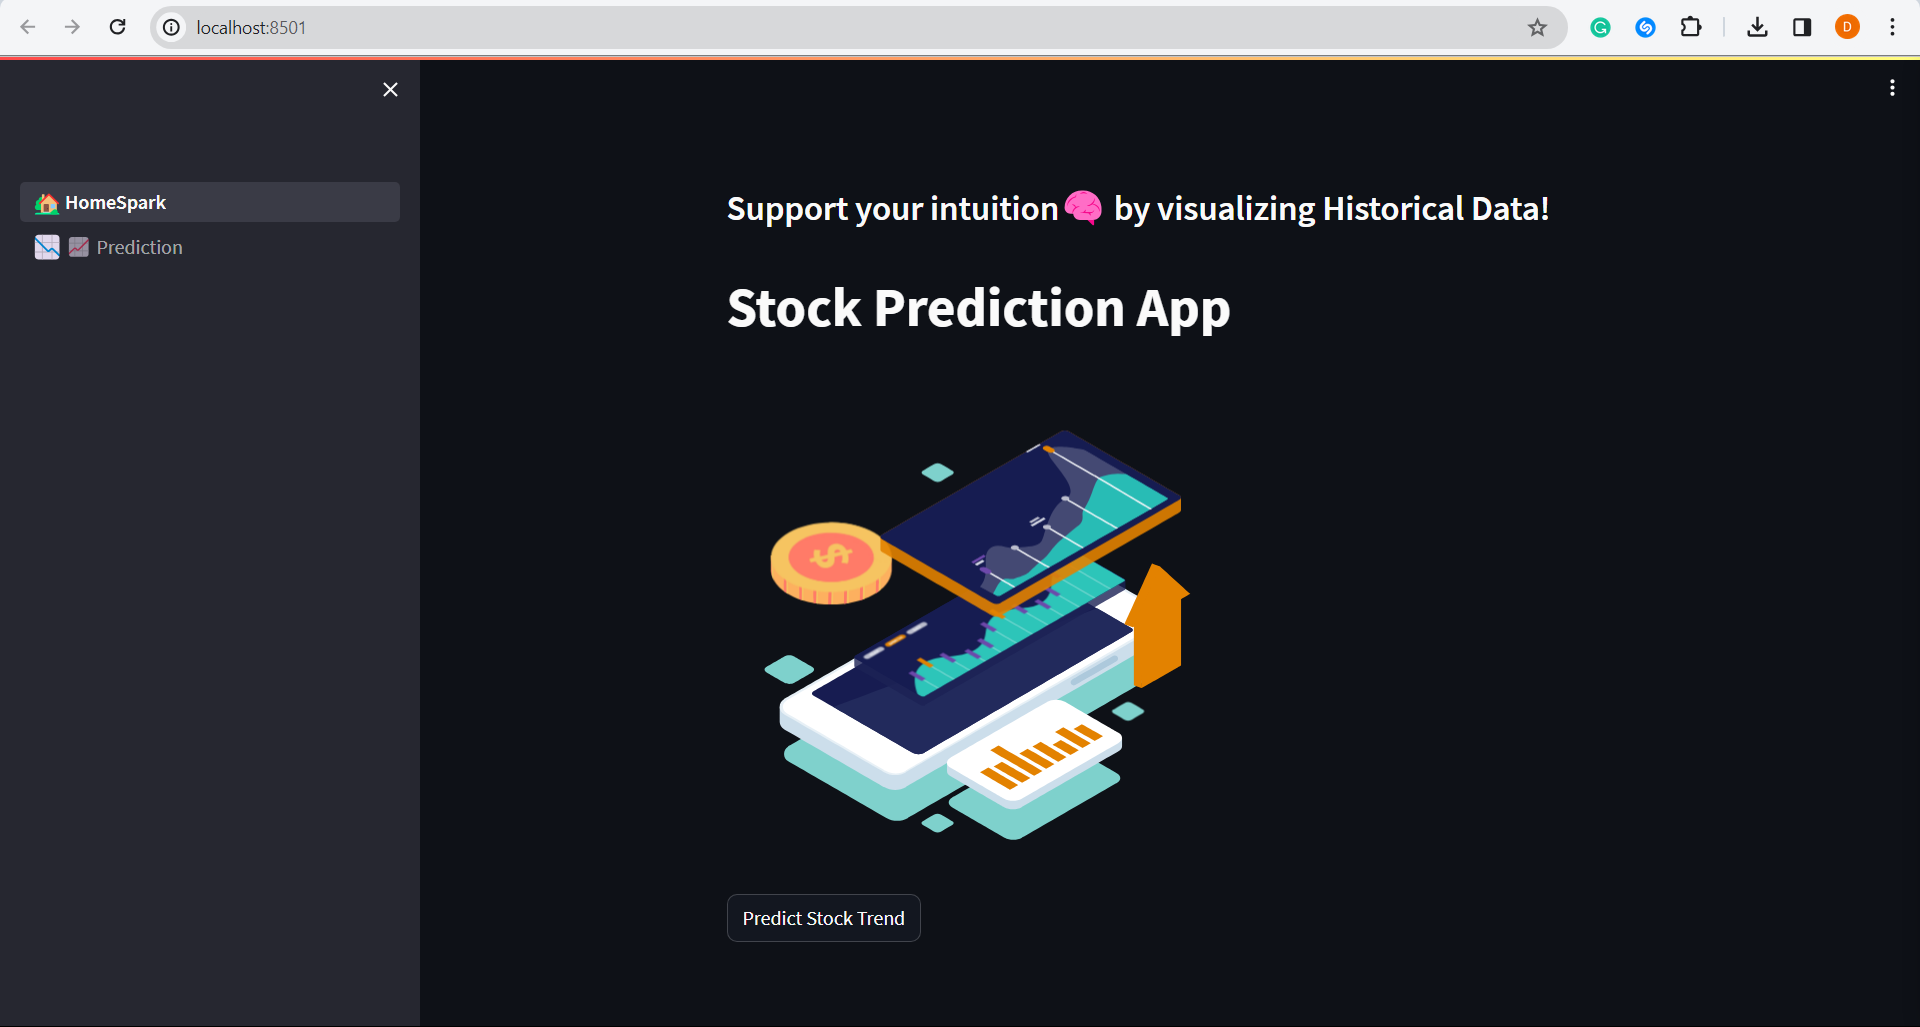![Homepage.png](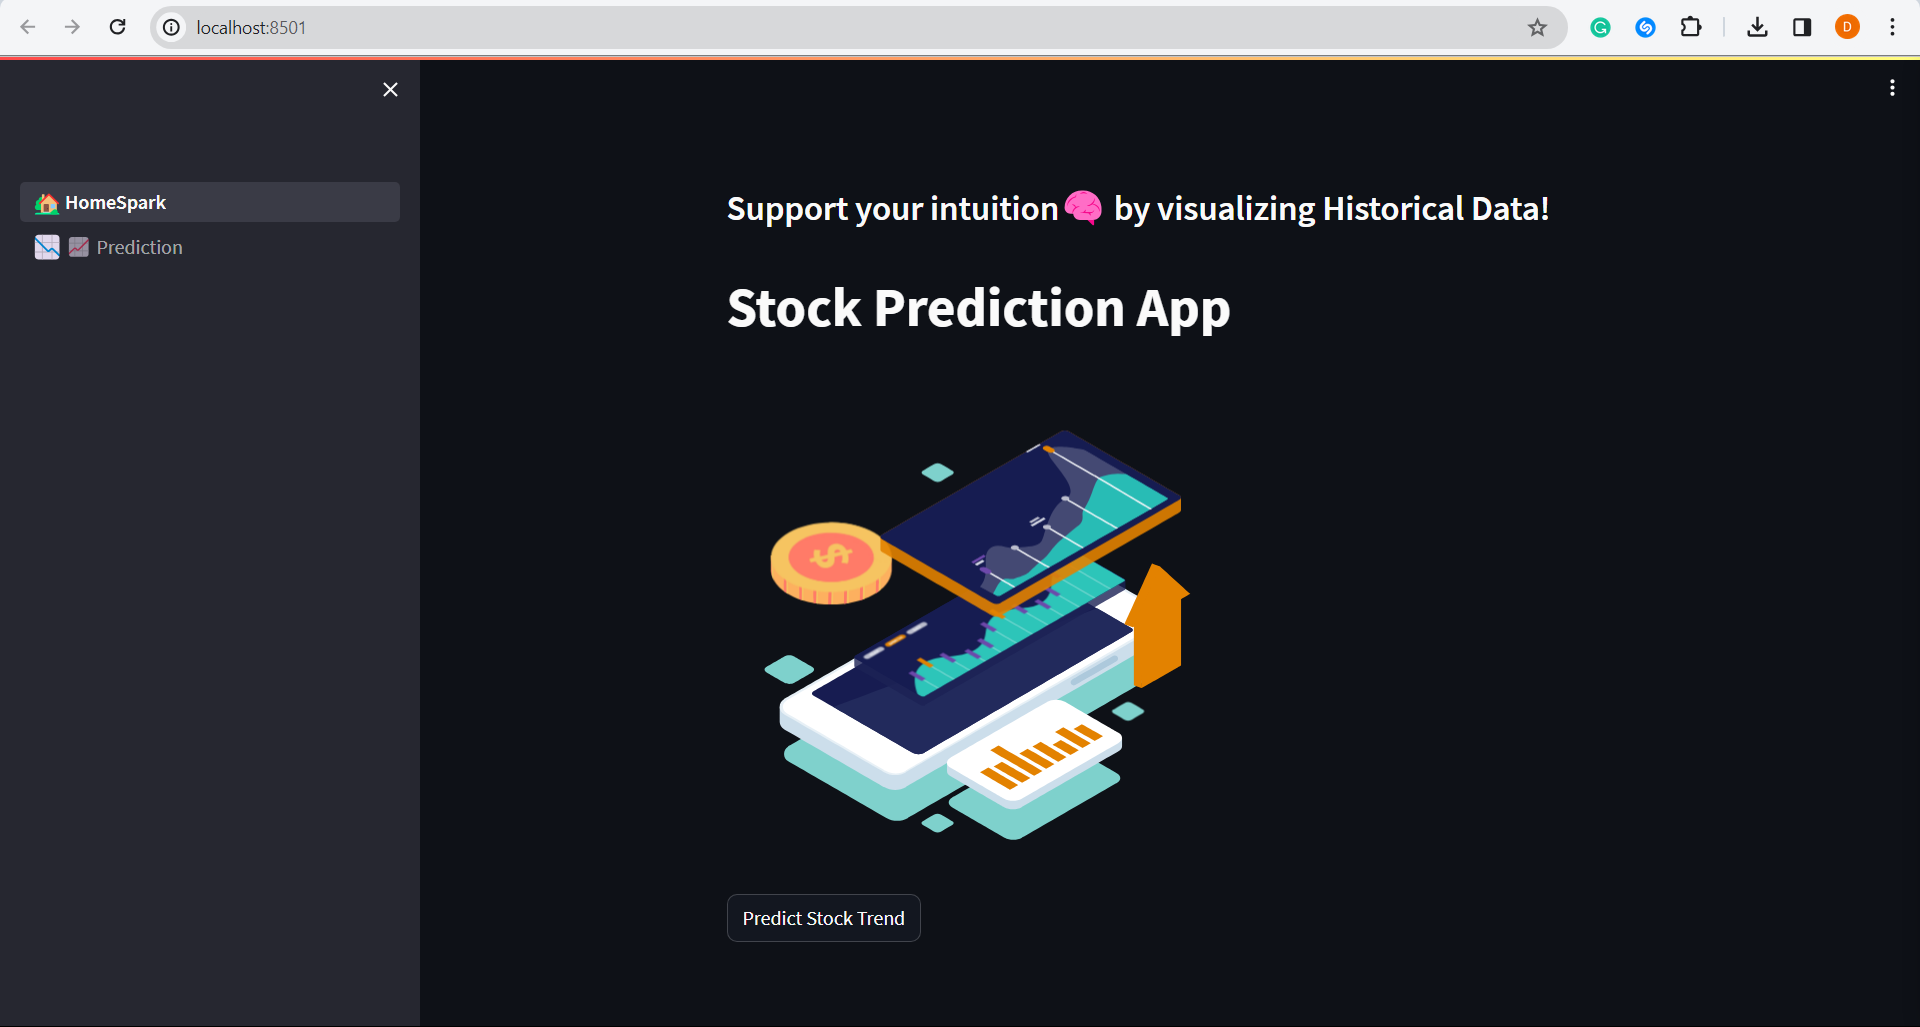![Prediction6.png](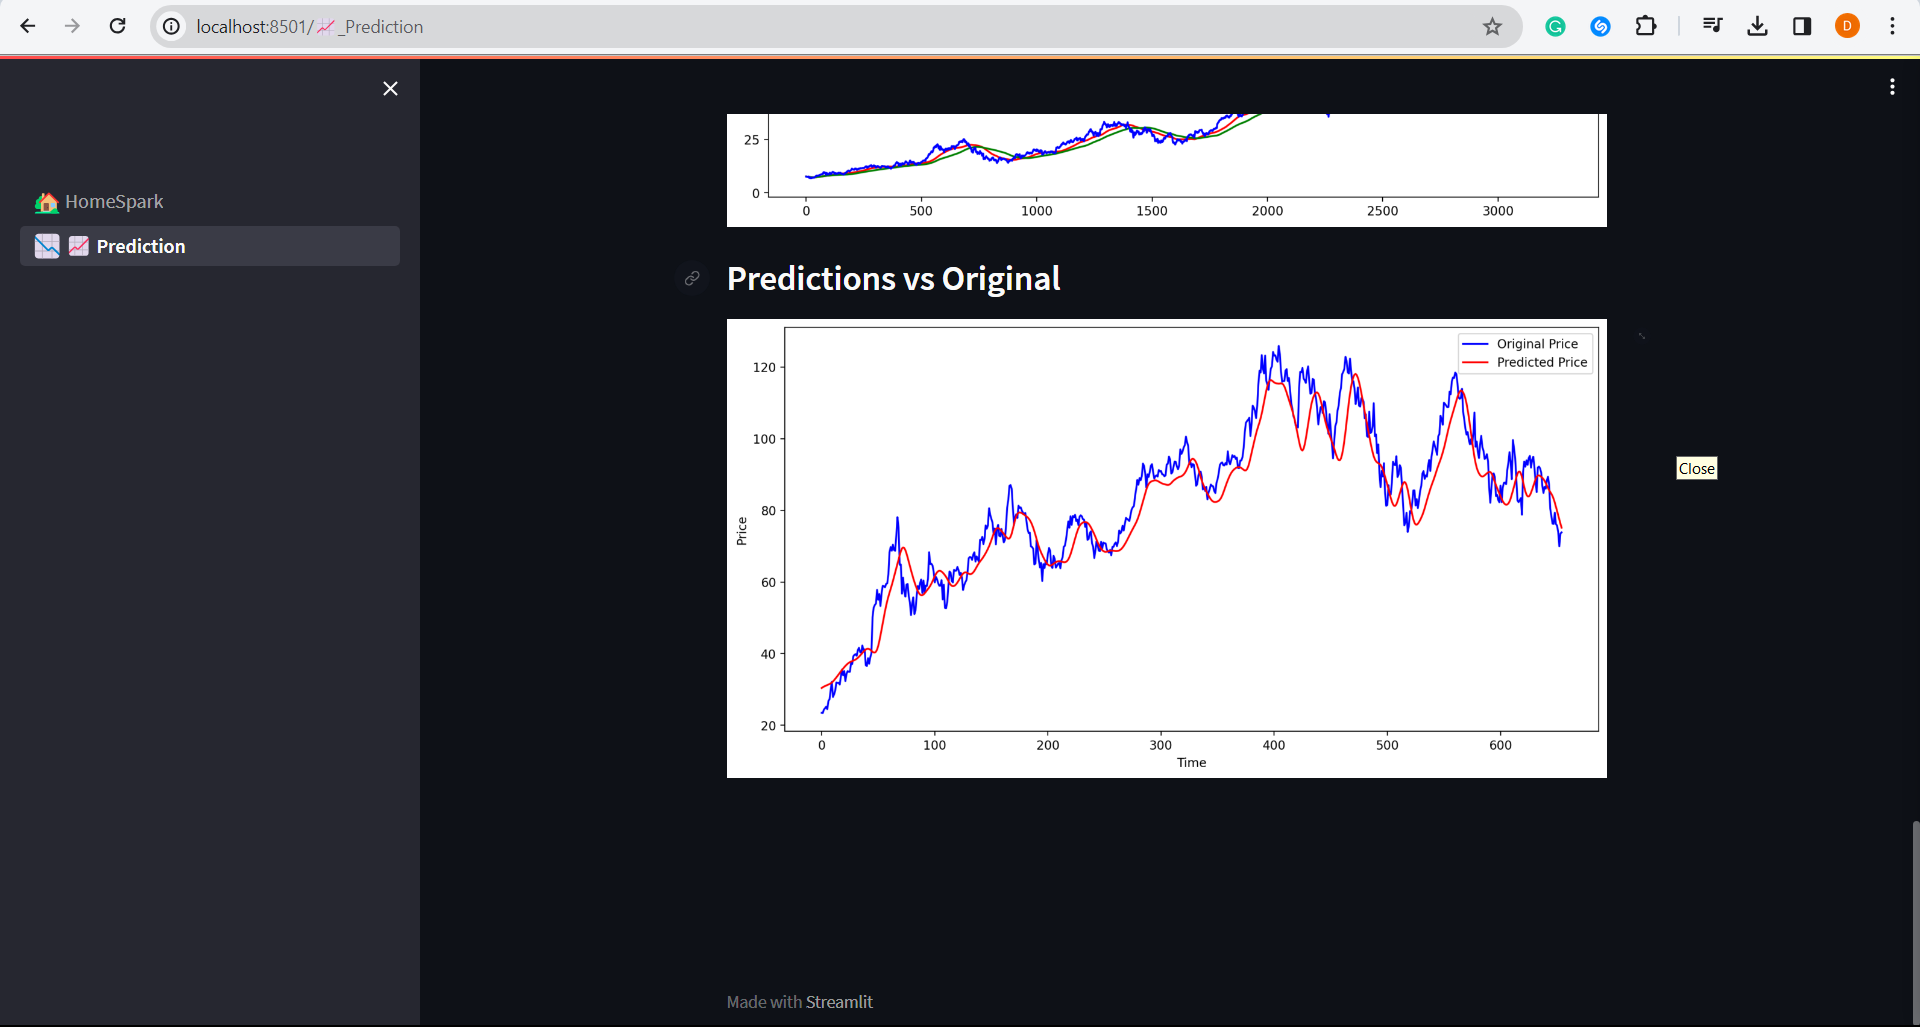![Homepage.png](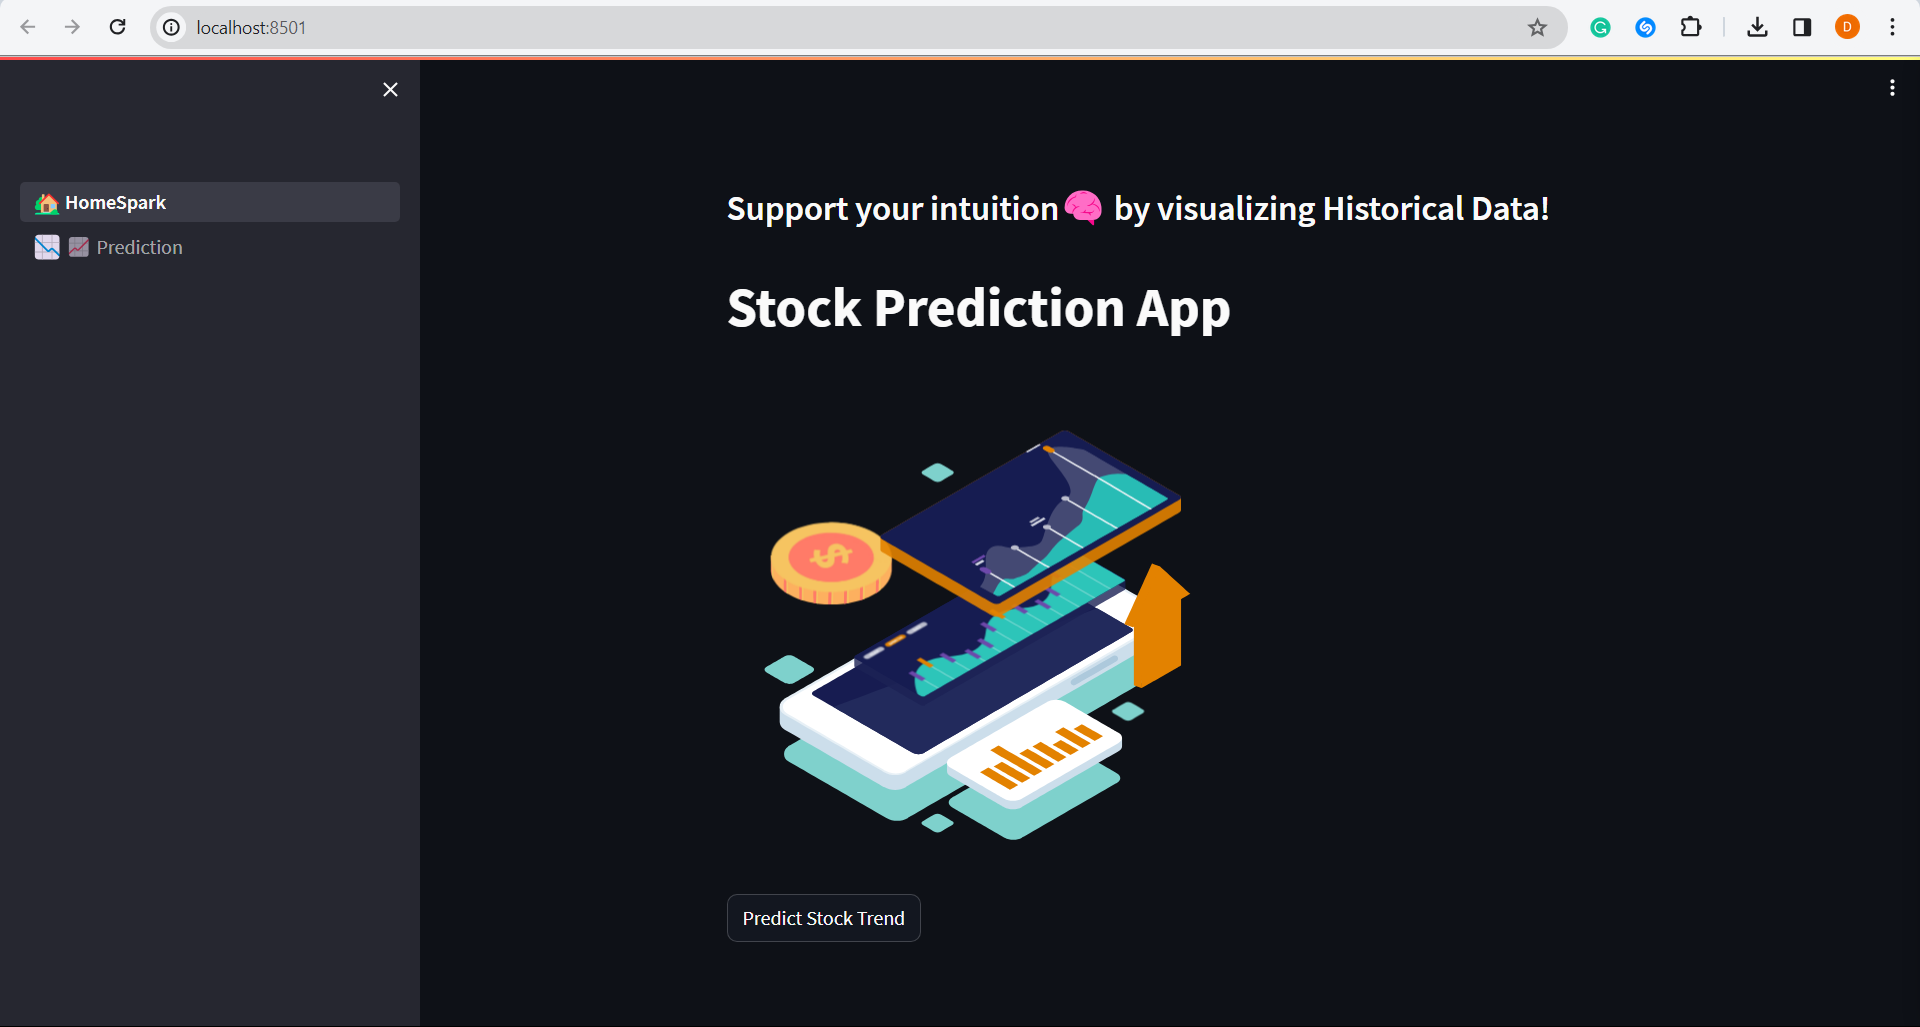![Prediction1.png](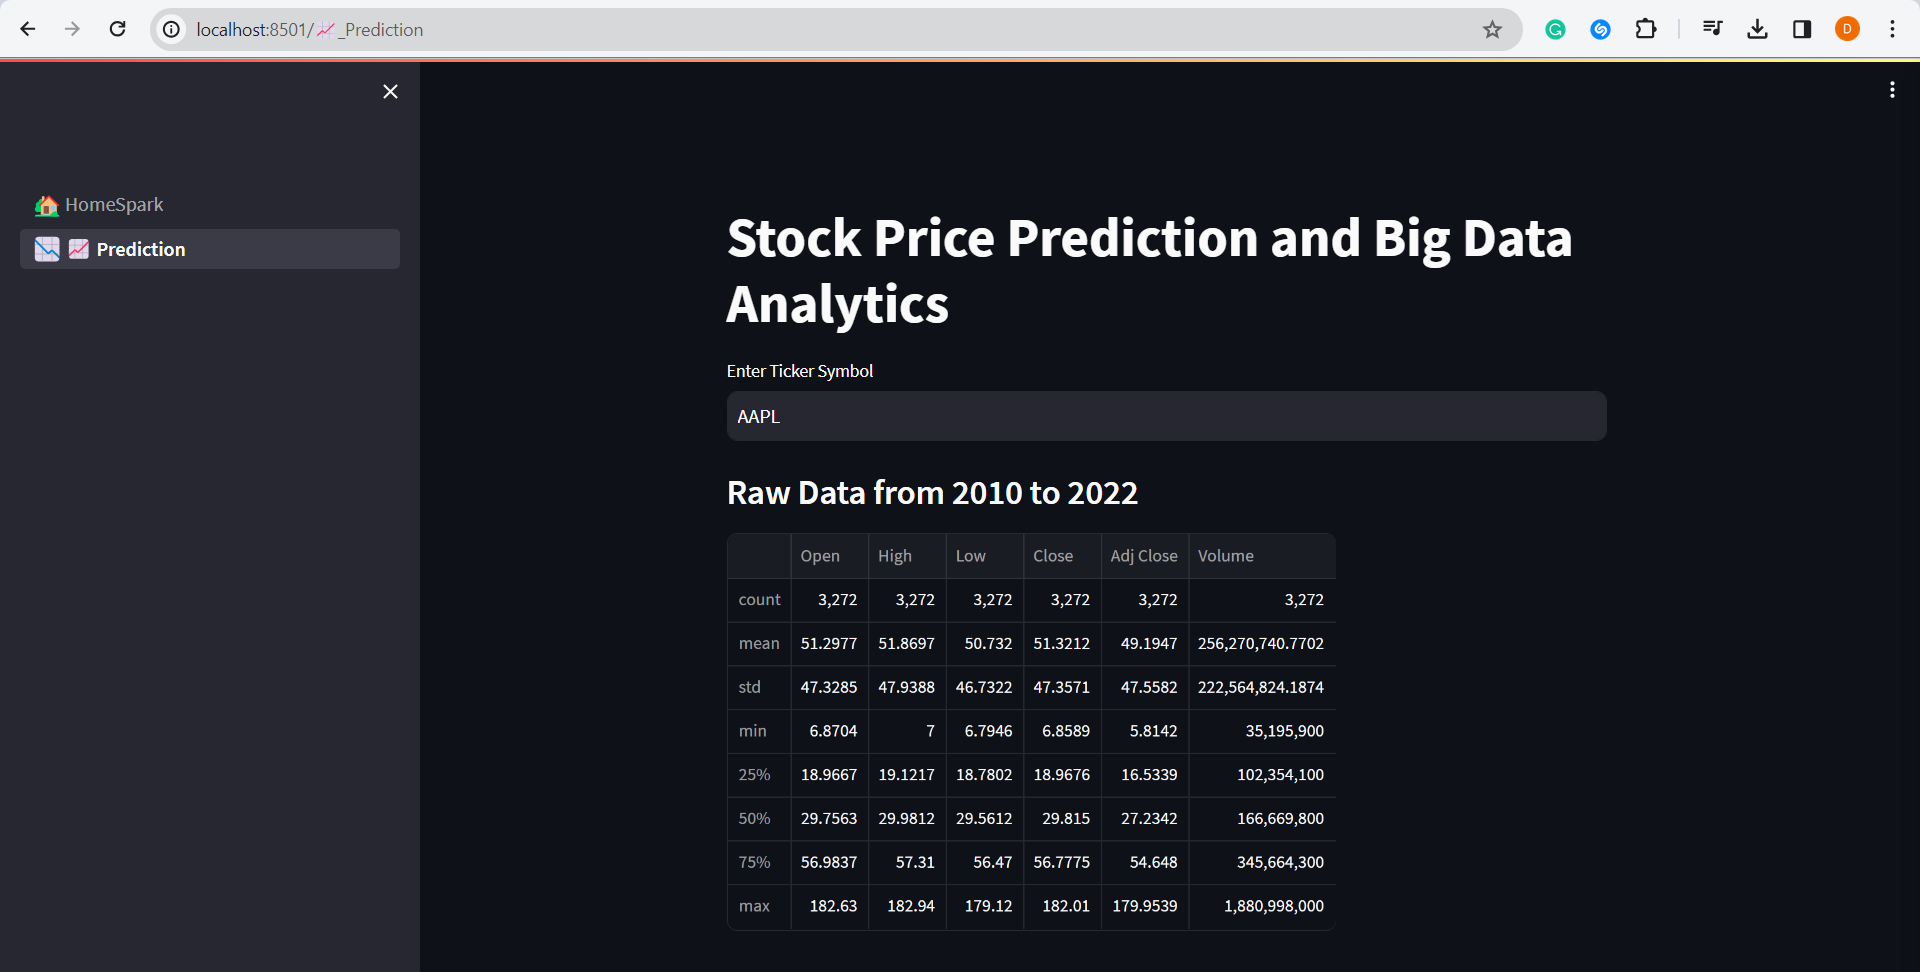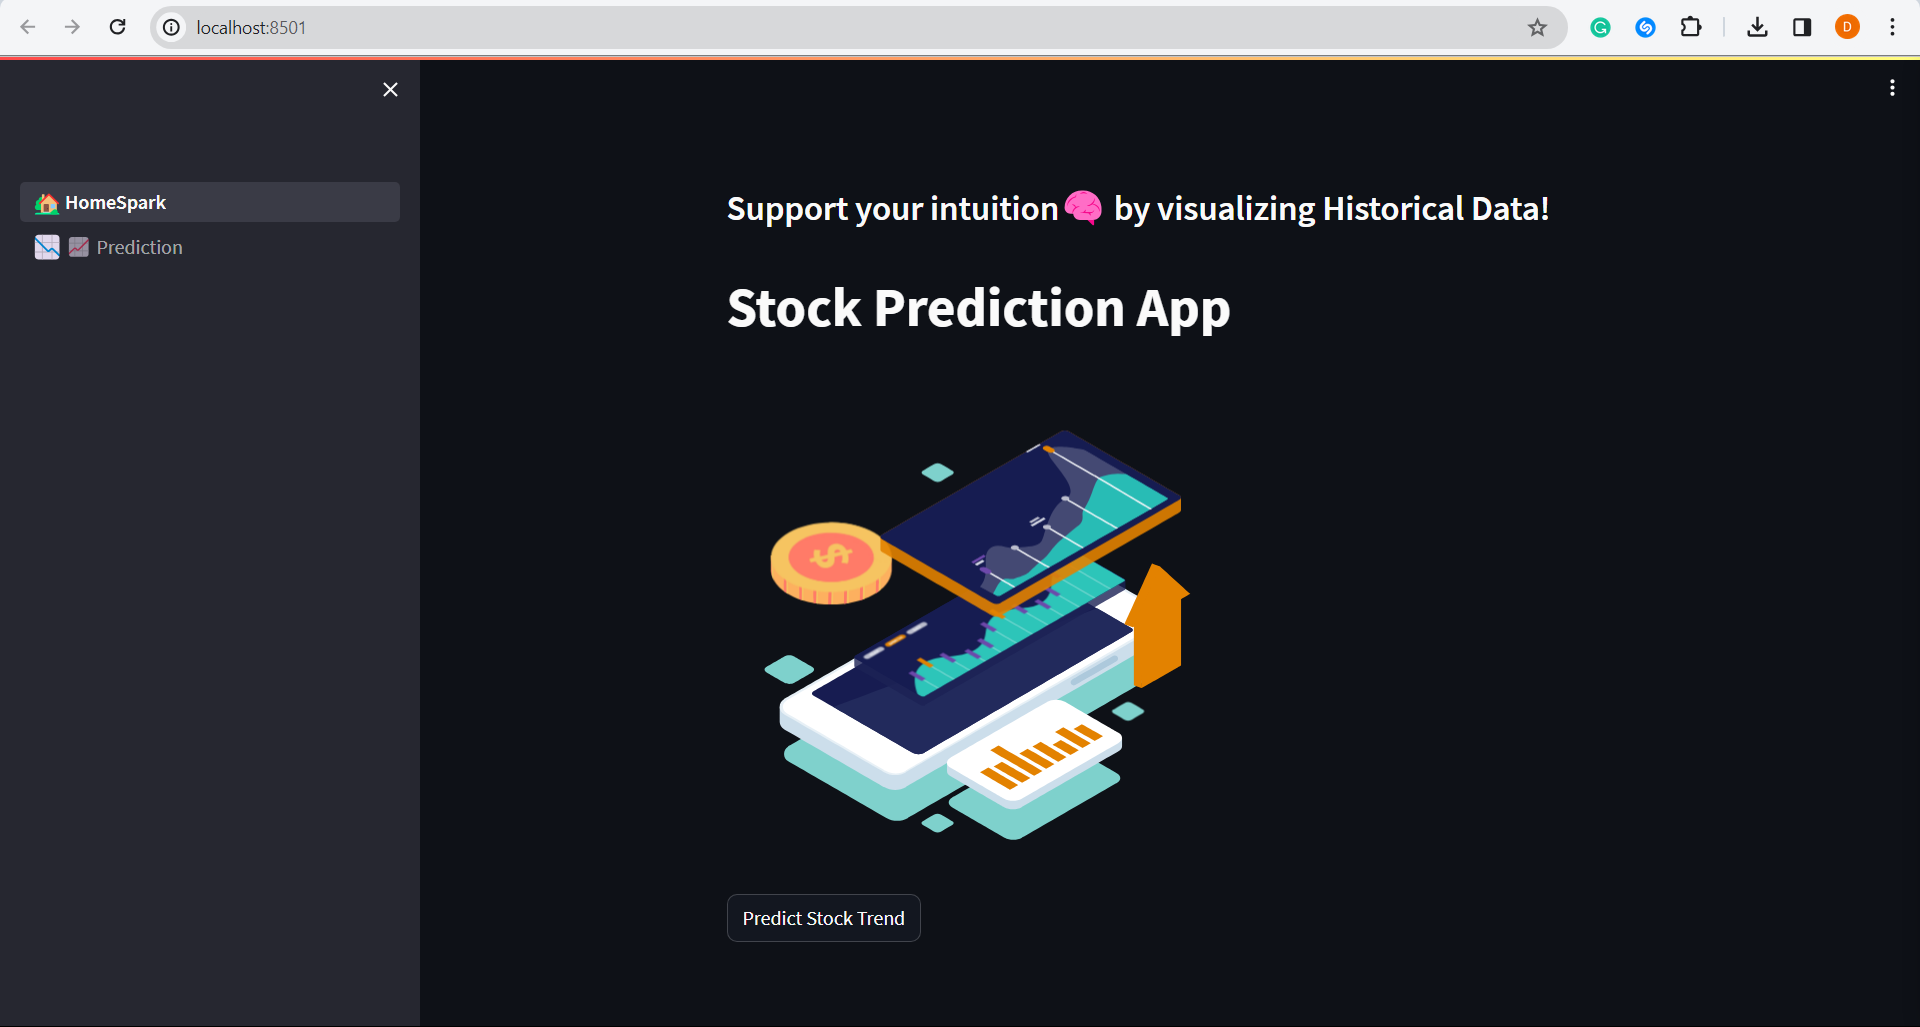)))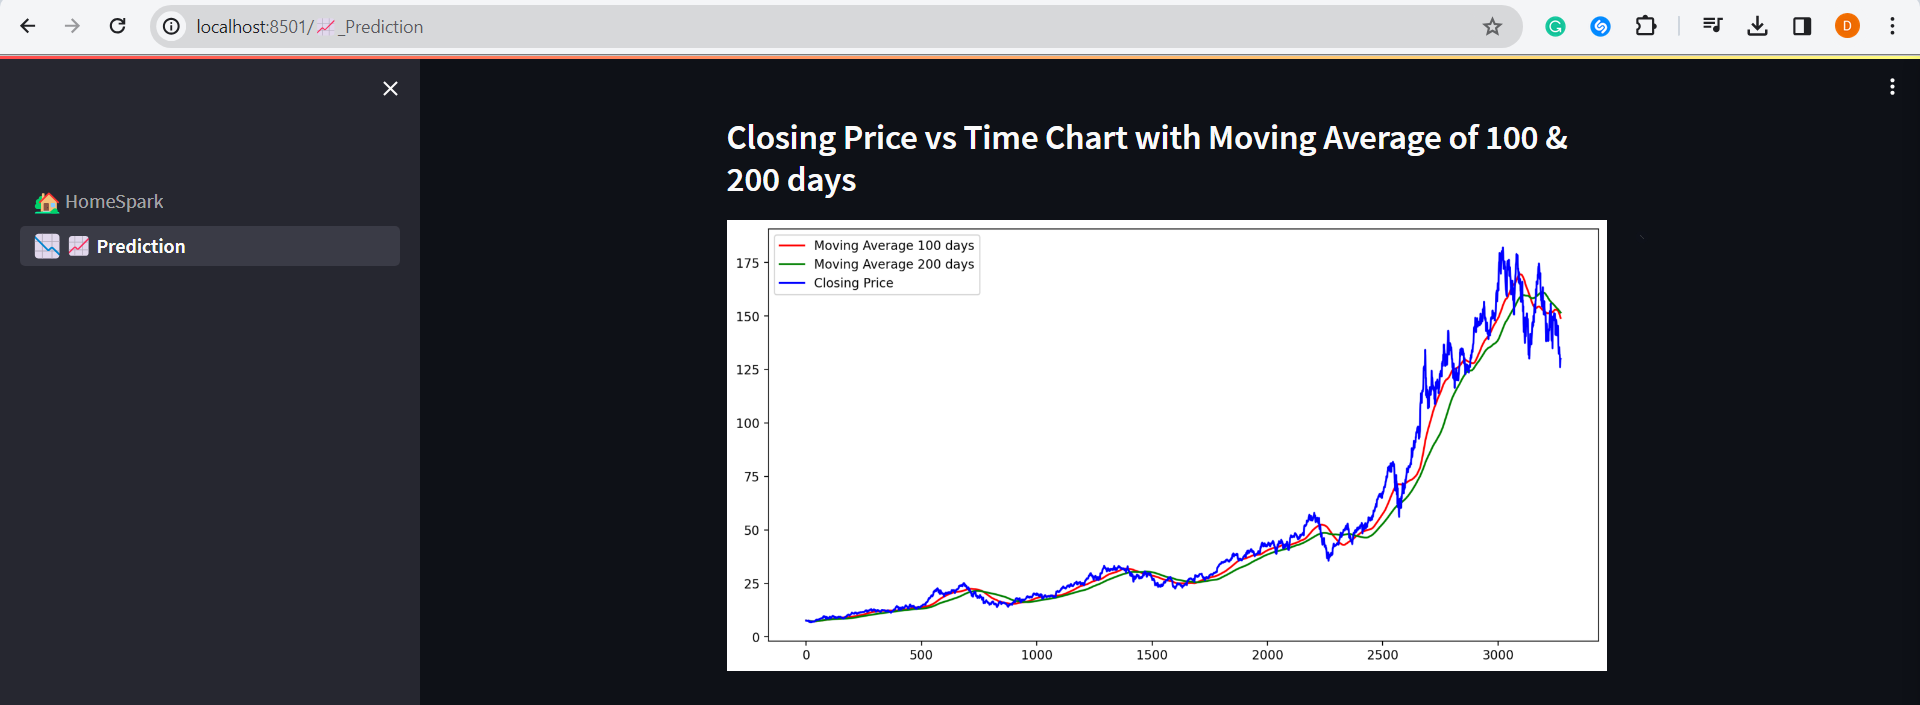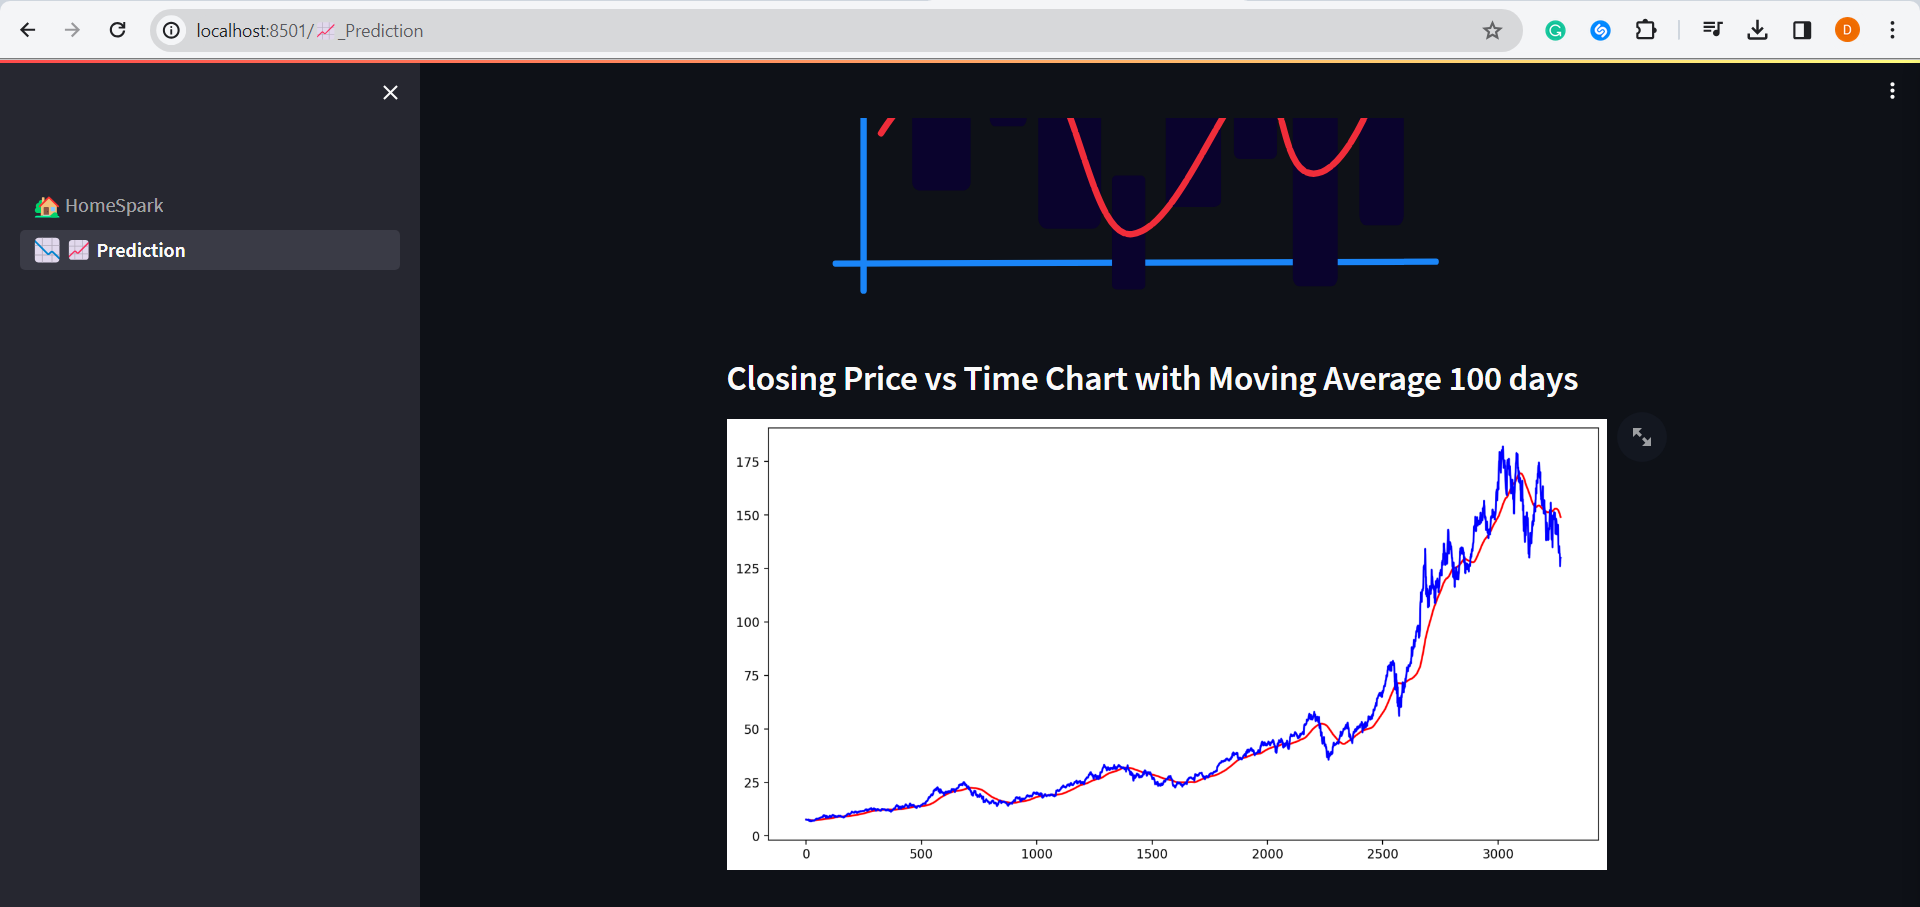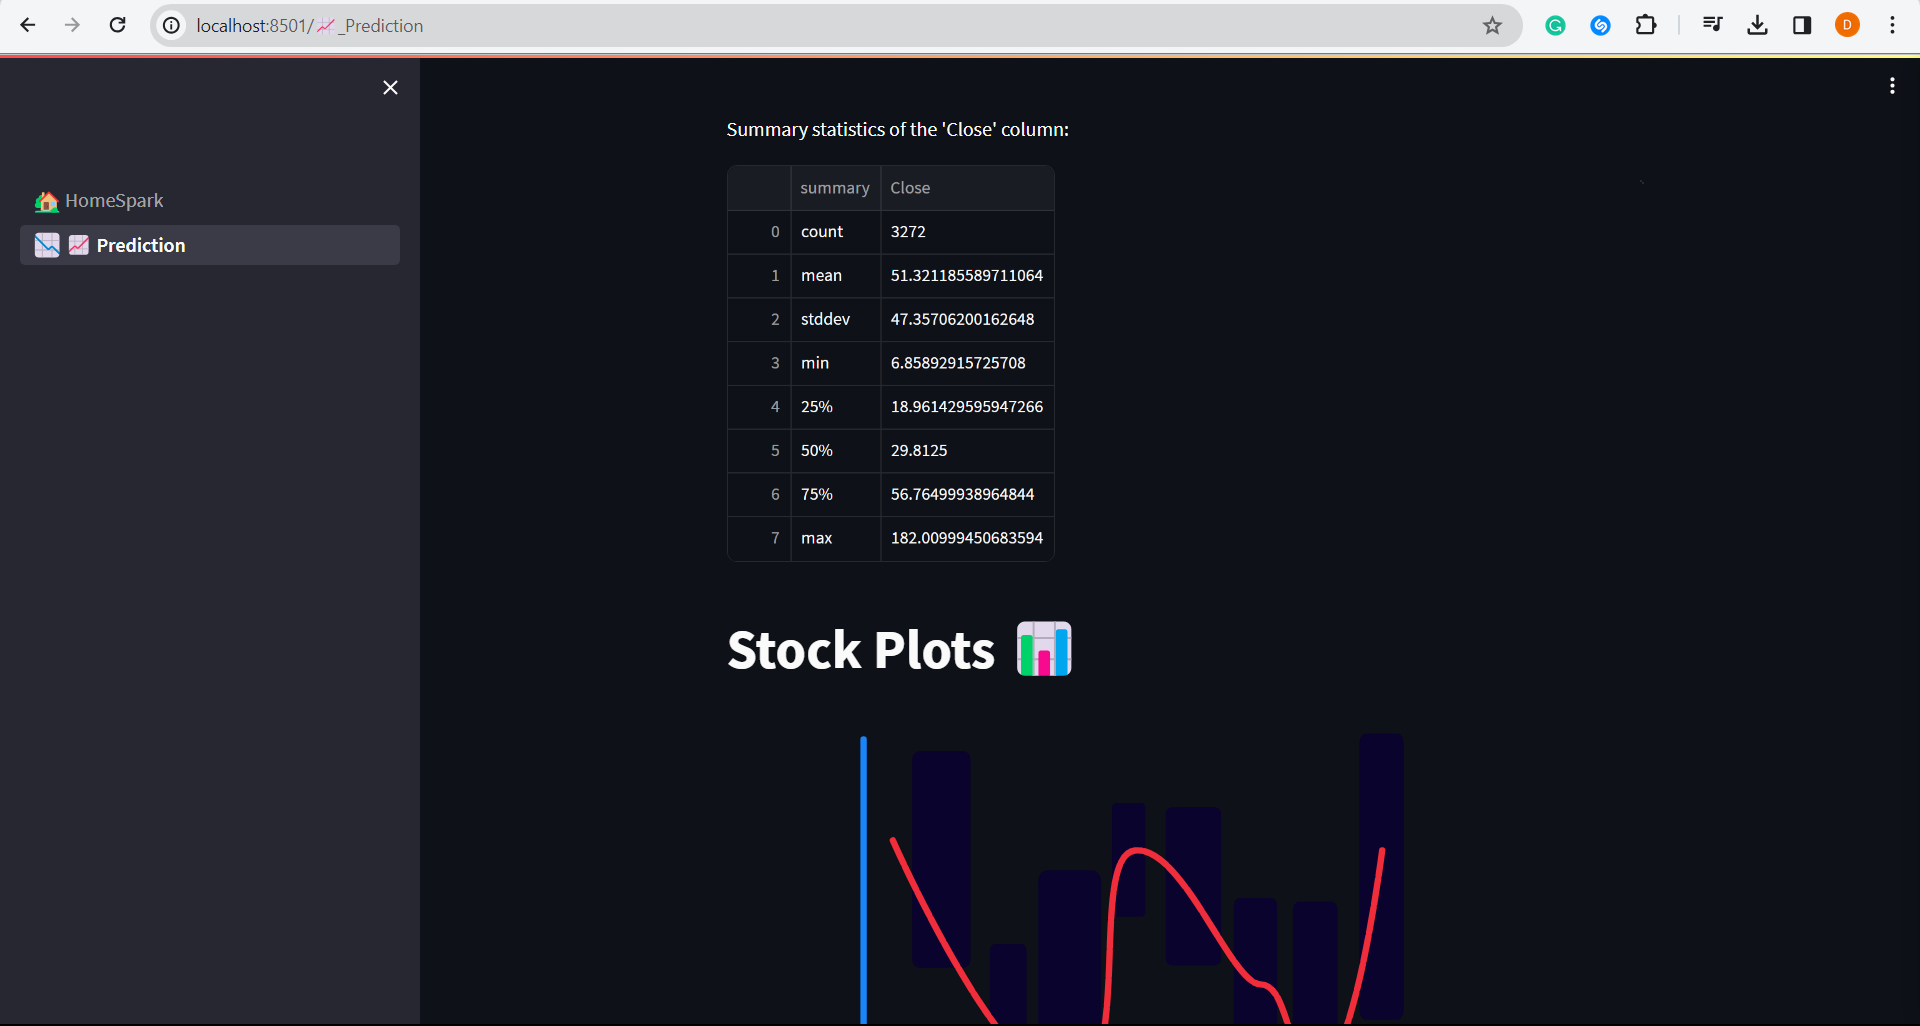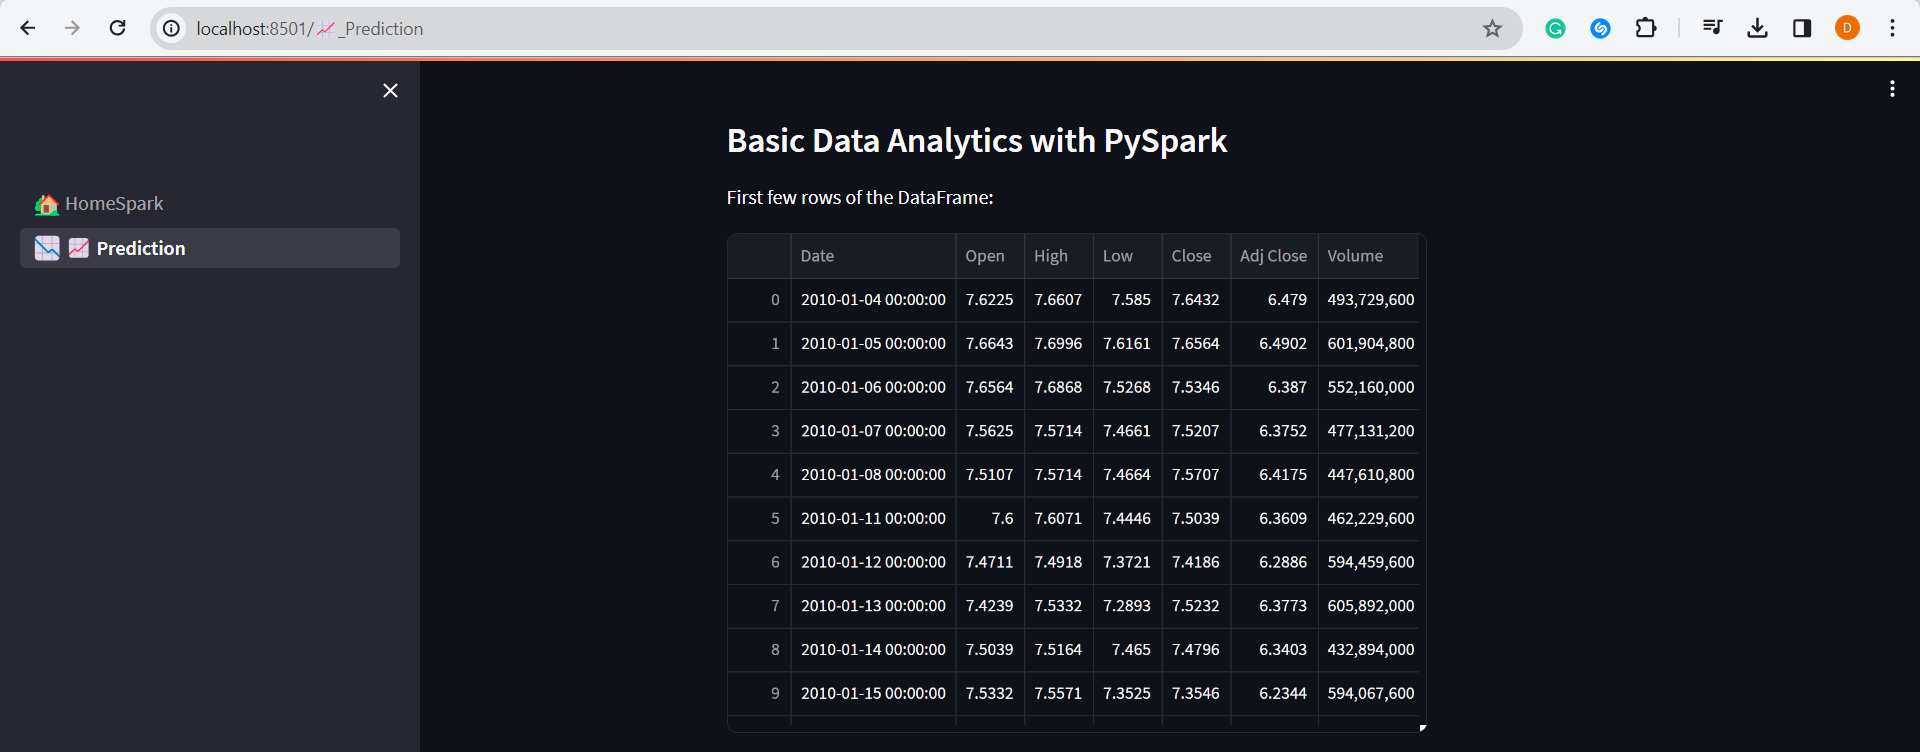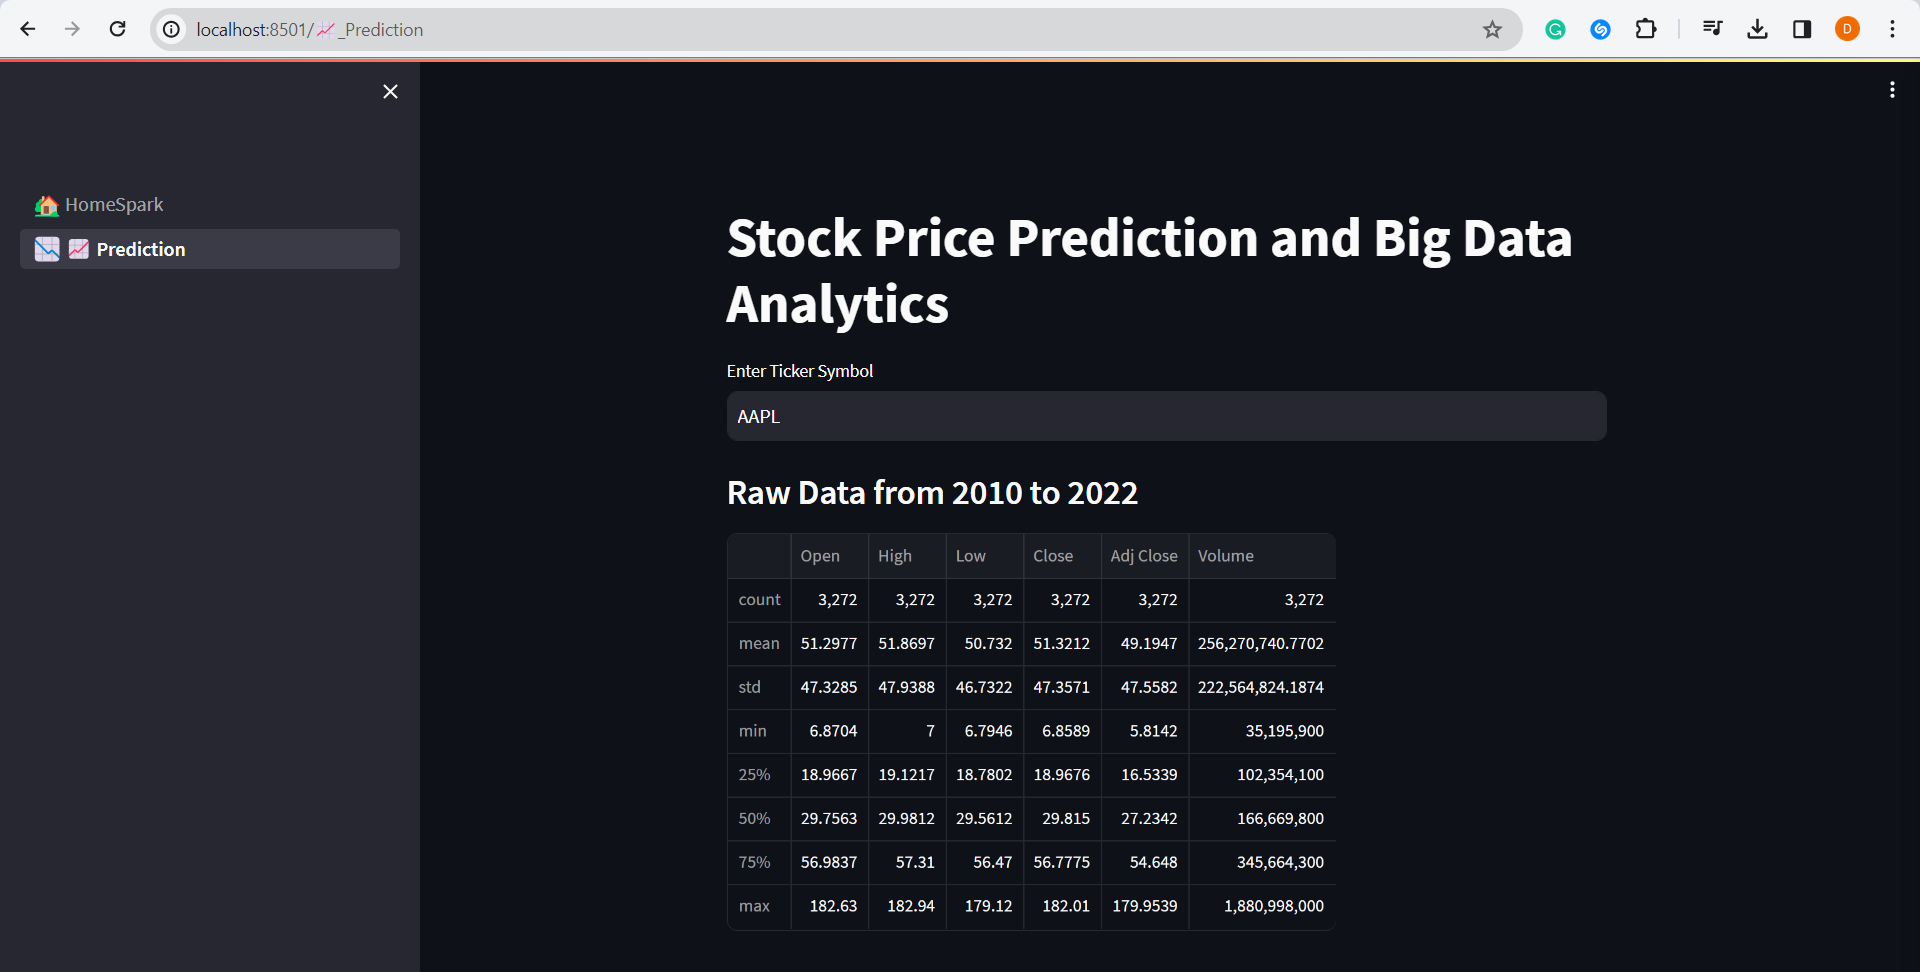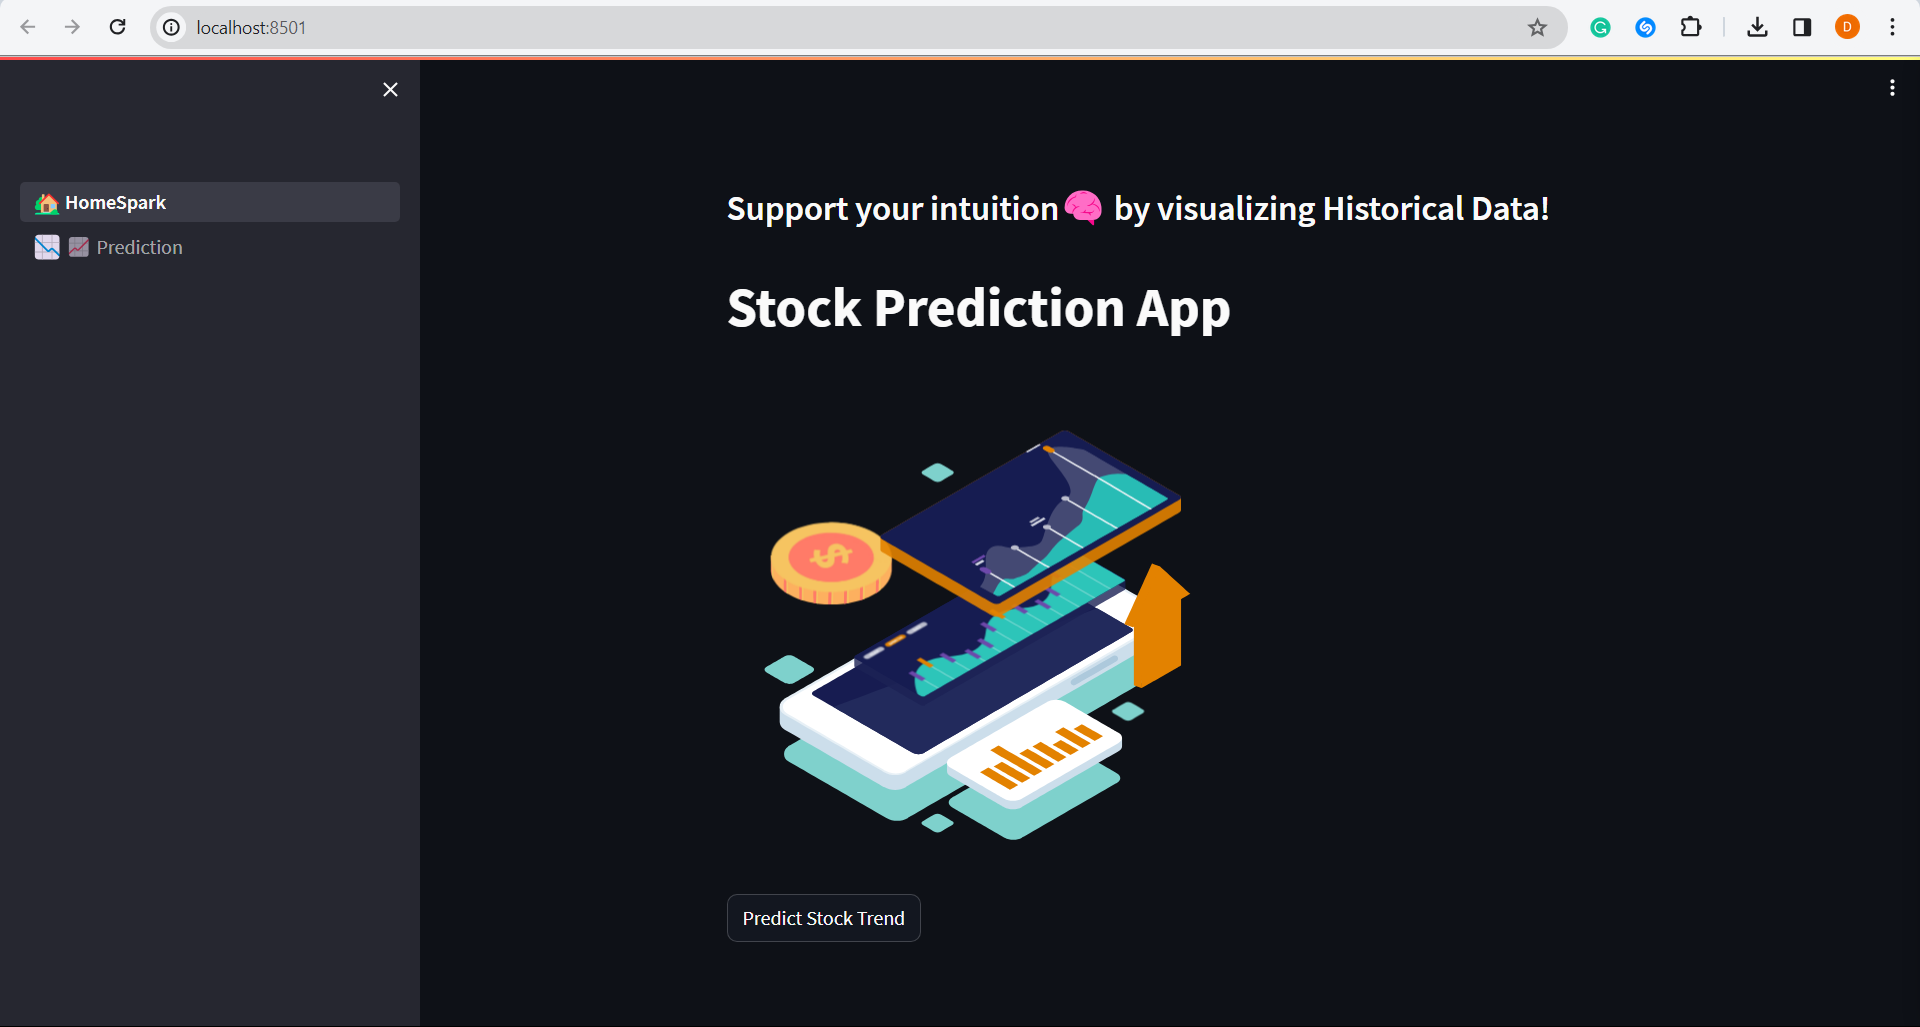))

#BY:
#Divyansh Agrawal - 21CSU214
#Shubham  - 21CSU238

In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
from pandas_datareader import data as pdr
import matplotlib.pyplot as plt
import pickle
import yfinance as yf

In [ ]:
#pip install pandas_datareader

In [ ]:
# Override Yahoo Finance API to use Pandas DataReader
yf.pdr_override()

# Fetch historical stock data for AAPL from Yahoo Finance
df = pdr.get_data_yahoo("AAPL",start="2010-01-01",end="2022-12-31")
df.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,7.622500,7.660714,7.585000,7.643214,6.496294,493729600
2010-01-05,7.664286,7.699643,7.616071,7.656429,6.507524,601904800
2010-01-06,7.656429,7.686786,7.526786,7.534643,6.404016,552160000
2010-01-07,7.562500,7.571429,7.466071,7.520714,6.392176,477131200
2010-01-08,7.510714,7.571429,7.466429,7.570714,6.434673,447610800


In [ ]:
# Reset the index of the dataframe
df = df.reset_index()

In [ ]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-01-04,7.622500,7.660714,7.585000,7.643214,6.496294,493729600
1,2010-01-05,7.664286,7.699643,7.616071,7.656429,6.507524,601904800
2,2010-01-06,7.656429,7.686786,7.526786,7.534643,6.404016,552160000
3,2010-01-07,7.562500,7.571429,7.466071,7.520714,6.392176,477131200
4,2010-01-08,7.510714,7.571429,7.466429,7.570714,6.434673,447610800


In [ ]:
# Drop unnecessary columns ('Adj Close' and 'Date') from the dataframe
df = df.drop(['Adj Close', 'Date'], axis=1)

In [ ]:
df.head()

,Open,High,Low,Close,Volume
0,7.622500,7.660714,7.585000,7.643214,493729600
1,7.664286,7.699643,7.616071,7.656429,601904800
2,7.656429,7.686786,7.526786,7.534643,552160000
3,7.562500,7.571429,7.466071,7.520714,477131200
4,7.510714,7.571429,7.466429,7.570714,447610800


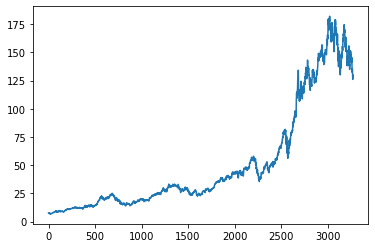

In [ ]:
#We will make predictions based on Close
plt.plot(df.Close)

In [ ]:
df

,Open,High,Low,Close,Volume
0,7.622500,7.660714,7.585000,7.643214,493729600
1,7.664286,7.699643,7.616071,7.656429,601904800
2,7.656429,7.686786,7.526786,7.534643,552160000
3,7.562500,7.571429,7.466071,7.520714,477131200
4,7.510714,7.571429,7.466429,7.570714,447610800
...,...,...,...,...,...
3267,130.919998,132.419998,129.639999,131.860001,63814900
3268,131.380005,131.410004,128.720001,130.029999,69007800
3269,129.669998,131.029999,125.870003,126.040001,85438400
3270,127.989998,130.479996,127.730003,129.610001,75703700


In [ ]:
# Calculate the 100-day moving average
mvAvg100 = df.Close.rolling(100).mean()
mvAvg100

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
3267    150.515600
3268    150.157800
3269    149.764699
3270    149.412100
3271    149.062199
Name: Close, Length: 3272, dtype: float64

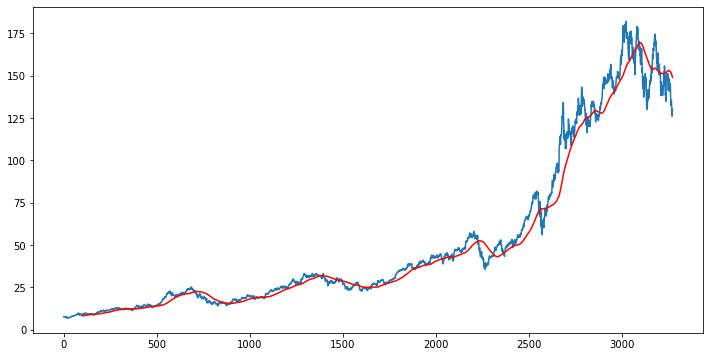

In [ ]:
# Plot the closing prices and the 100-day moving average
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(mvAvg100, 'r')

In [ ]:
# Calculate the 200-day moving average
mvAvg200 = df.Close.rolling(200).mean() #moving avg for 200 days
mvAvg200

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
          ...   
3267    152.1331
3268    152.0096
3269    151.8867
3270    151.7593
3271    151.6110
Name: Close, Length: 3272, dtype: float64

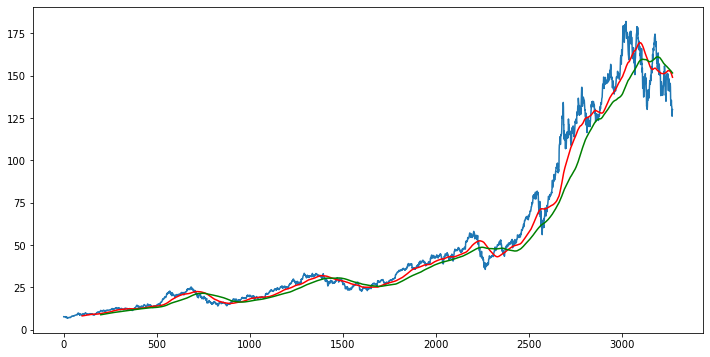

In [ ]:
# Plot the closing prices, 100-day moving average, and 200-day moving average
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(mvAvg100, 'r')
plt.plot(mvAvg200, 'g')

In [ ]:
df.shape

(3272, 5)

In [ ]:
#Splitting the data

train_data = pd.DataFrame(df['Close'][0:int(len(df)*0.80)]) #80%
test_data = pd.DataFrame(df['Close'][int(len(df)*0.80): int(len(df))]) #20%

print(train_data.shape)
print(test_data.shape)

(2617, 1)
(655, 1)


In [ ]:
# Preprocess the data using MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

C:\Users\Divyansh\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.25.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [ ]:
train_data_arr = scaler.fit_transform(train_data)
train_data_arr

array([[0.01046536],
       [0.01064169],
       [0.0090166 ],
       ...,
       [0.97227823],
       [0.96507255],
       [0.96967609]])

In [ ]:
# Prepare the training data for the LSTM model
x_train = []
y_train = []

for i in range(100, train_data_arr.shape[0]):
    x_train.append(train_data_arr[i-100: i])
    y_train.append(train_data_arr[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train)

In [ ]:
# Display the shape of the training data
x_train.shape

(2517, 100, 1)

In [ ]:
# Import Keras libraries for building the LSTM model
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [ ]:
# Creating the LSTM model
model = Sequential()

model.add(LSTM(units = 50, activation = 'relu', return_sequences = True,
              input_shape = (x_train.shape[1], 1)))
model.add(Dropout(0.2))

model.add(LSTM(units = 60, activation = 'relu', return_sequences = True))
model.add(Dropout(0.3))

model.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
model.add(Dropout(0.4))

model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units = 1))

In [ ]:
# Display the summary of the model
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 100, 50)           10400     
                                                                 
 dropout_4 (Dropout)         (None, 100, 50)           0         
                                                                 
 lstm_5 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_5 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_6 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_6 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_7 (LSTM)               (None, 120)              

In [ ]:
df.shape

(3272, 5)

In [ ]:
# Compiling the model
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [ ]:
# Train the model
model.fit(x_train, y_train, epochs = 50)

Epoch 1/50
79/79 [==============================] - 88s 949ms/step - loss: 0.0226
Epoch 2/50
79/79 [==============================] - 75s 946ms/step - loss: 0.0053
Epoch 3/50
79/79 [==============================] - 75s 946ms/step - loss: 0.0049
Epoch 4/50
79/79 [==============================] - 75s 944ms/step - loss: 0.0041
Epoch 5/50
79/79 [==============================] - 75s 949ms/step - loss: 0.0047
Epoch 6/50
79/79 [==============================] - 74s 940ms/step - loss: 0.0034
Epoch 7/50
79/79 [==============================] - 74s 938ms/step - loss: 0.0036
Epoch 8/50
79/79 [==============================] - 74s 937ms/step - loss: 0.0029
Epoch 9/50
79/79 [==============================] - 76s 963ms/step - loss: 0.0031
Epoch 10/50
79/79 [==============================] - 79s 1s/step - loss: 0.0029
Epoch 11/50
79/79 [==============================] - 79s 1s/step - loss: 0.0030
Epoch 12/50
79/79 [==============================] - 79s 1s/step - loss: 0.0029
Epoch 13/50
79/79 [===

In [ ]:
# Save the trained model
model.save('LSTM_Model.keras')

In [ ]:
test_data.head()

,Close
2617,79.562500
2618,79.485001
2619,80.462502
2620,80.834999
2621,81.279999


In [ ]:
train_data.tail(100)

,Close
2517,74.357498
2518,74.949997
2519,74.597504
2520,75.797501
2521,77.407501
...,...
2612,79.807503
2613,79.212502
2614,79.722504
2615,79.182503


In [ ]:
# Prepare the test data for predictions
past_100_days = train_data.tail(100)

In [ ]:
final_df = past_100_days.append(test_data, ignore_index = True)

C:\Users\Divyansh\AppData\Local\Temp\ipykernel_11292\2193160181.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df = past_100_days.append(test_data, ignore_index = True)


In [ ]:
# Display the first few rows of the final dataframe
final_df.head()

,Close
0,74.357498
1,74.949997
2,74.597504
3,75.797501
4,77.407501


In [ ]:
# Preprocess the input data for testing
input_data = scaler.fit_transform(final_df)
input_data

array([[0.14505529],
       [0.14976075],
       [0.14696135],
       [0.15649137],
       [0.16927753],
       [0.17066729],
       [0.18383068],
       [0.17533306],
       [0.17267259],
       [0.18041574],
       [0.18734493],
       [0.1830564 ],
       [0.18529994],
       [0.18833764],
       [0.18651102],
       [0.16792745],
       [0.18528007],
       [0.19848314],
       [0.19754999],
       [0.16903929],
       [0.16735166],
       [0.18758317],
       [0.19274529],
       [0.20021045],
       [0.18992596],
       [0.19294378],
       [0.18909205],
       [0.2041615 ],
       [0.19953542],
       [0.19969428],
       [0.18788097],
       [0.19705363],
       [0.190462  ],
       [0.17606765],
       [0.14654436],
       [0.12649154],
       [0.13556496],
       [0.09758373],
       [0.09726605],
       [0.14779519],
       [0.12895351],
       [0.15559791],
       [0.13610106],
       [0.12837772],
       [0.08299089],
       [0.12105149],
       [0.1013759 ],
       [0.047

In [ ]:
input_data.shape

(755, 1)

In [ ]:
# Prepare the test data for LSTM model predictions
x_test = []
y_test = []

for i in range(100, input_data.shape[0]):
    x_test.append(input_data[i-100: i])
    y_test.append(input_data[i, 0])

In [ ]:
x_test, y_test = np.array(x_test), np.array(y_test)

# Display the shape of the test data
print(x_test.shape)
print(y_test.shape)

(655, 100, 1)
(655,)


In [ ]:
# Make predictions using the trained LSTM model

y_predicted = model.predict(x_test)

21/21 [==============================] - 6s 263ms/step


In [ ]:
# Display the shape of the predicted values
y_predicted.shape

(655, 1)

In [ ]:
# Scale back the predicted and test values to their original scale
y_test

array([0.1863919 , 0.18577642, 0.19353945, 0.19649772, 0.20003177,
       0.1944726 , 0.21269881, 0.21659023, 0.23749677, 0.25506781,
       0.22143467, 0.2271924 , 0.23551135, 0.25355887, 0.25258603,
       0.25286402, 0.24887329, 0.26703994, 0.28224831, 0.2694026 ,
       0.27889294, 0.25663632, 0.27281754, 0.2788135 , 0.27744355,
       0.27744355, 0.29678165, 0.29447855, 0.31171204, 0.31496817,
       0.31629838, 0.31278419, 0.32533211, 0.33063316, 0.32108326,
       0.31953463, 0.33565629, 0.32487544, 0.32703954, 0.29187765,
       0.29005103, 0.30748307, 0.2951139 , 0.30930969, 0.31844267,
       0.39841567, 0.41967958, 0.42545718, 0.428614  , 0.45911013,
       0.43695282, 0.44977866, 0.42315407, 0.4520222 , 0.46790562,
       0.46709158, 0.46470905, 0.47229339, 0.47344491, 0.49383529,
       0.54224001, 0.55405326, 0.54585344, 0.55933451, 0.5473227 ,
       0.54571451, 0.57932771, 0.62014809, 0.59807015, 0.5145234 ,
       0.51515875, 0.45051326, 0.48625094, 0.45583419, 0.44400

In [ ]:
y_predicted

array([[0.24135318],
       [0.2430608 ],
       [0.24448636],
       [0.24570712],
       [0.24682057],
       [0.24792221],
       [0.24903402],
       [0.25025898],
       [0.25168192],
       [0.25346422],
       [0.2558074 ],
       [0.25860524],
       [0.26165396],
       [0.26480645],
       [0.26808888],
       [0.27148664],
       [0.27495572],
       [0.2783247 ],
       [0.28150445],
       [0.28456658],
       [0.28748766],
       [0.29031733],
       [0.2929244 ],
       [0.29522464],
       [0.29716828],
       [0.2987455 ],
       [0.29999772],
       [0.30107307],
       [0.30207482],
       [0.30316836],
       [0.30452773],
       [0.30622786],
       [0.3082886 ],
       [0.3106736 ],
       [0.31334567],
       [0.31621107],
       [0.31909528],
       [0.32186973],
       [0.32445797],
       [0.3266982 ],
       [0.32815686],
       [0.32851085],
       [0.32780078],
       [0.32618654],
       [0.32400265],
       [0.32166636],
       [0.32007214],
       [0.319

In [ ]:
# Scale back the predicted and test values to their original scale
scaler.scale_

array([0.00794171])

In [ ]:
# Scale back the predicted and test values to their original scale
scale_factor = 1/0.00794171
y_predicted = y_predicted * scale_factor
y_test = y_test * scale_factor

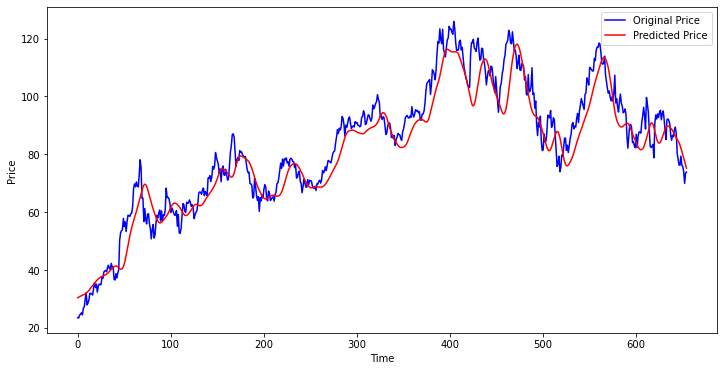

In [ ]:
# Plot the original and predicted prices
plt.figure(figsize = (12,6))
plt.plot(y_test, 'b', label = 'Original Price')
plt.plot(y_predicted, 'r', label = 'Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

#Screenshots of the Web App:


In [ ]:
from google.colab import drive
import os
# Mount Google Drive
drive.mount('/content/gdrive')

# Change to the directory where your images are stored
os.chdir('/content/gdrive/My Drive/IAIML Project SS')


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
# List all files in the directory
file_list = os.listdir()
file_list


['Prediction1.png',
 'Prediction2.png',
 'Prediction3.png',
 'Prediction4.png',
 'Prediction5.png',
 'Prediction6.png',
 'Homepage.png']

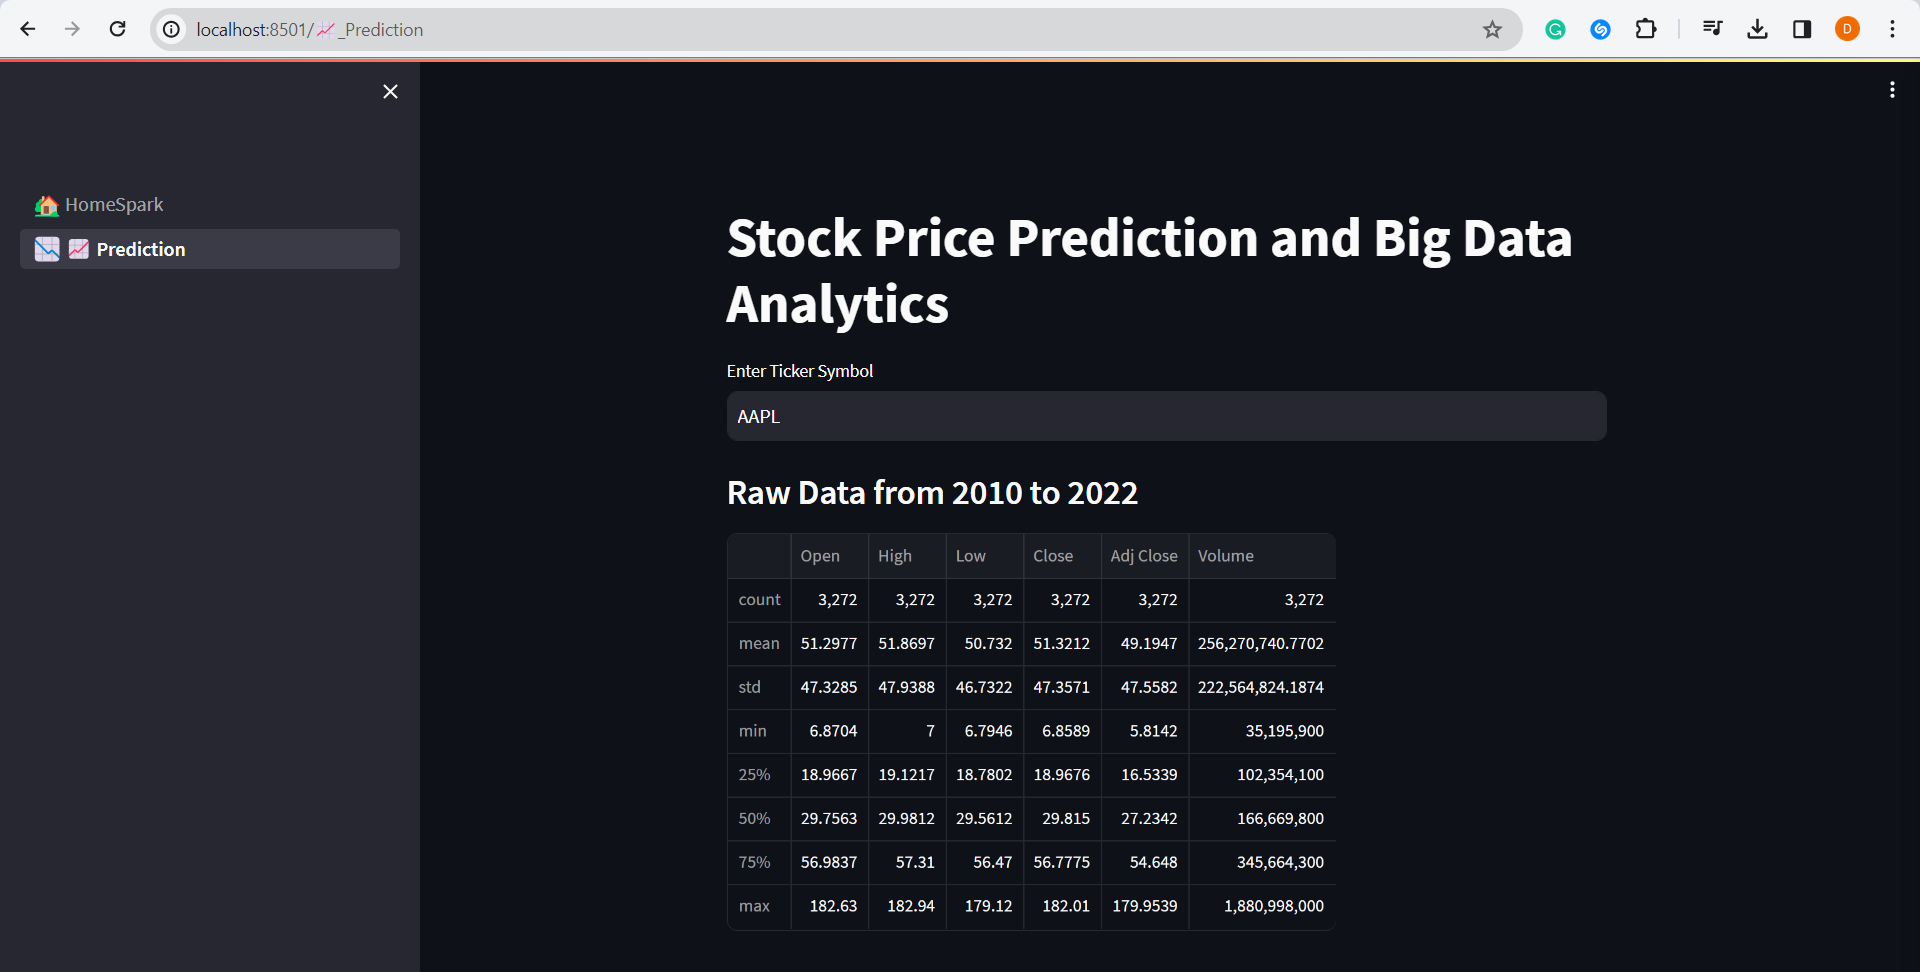

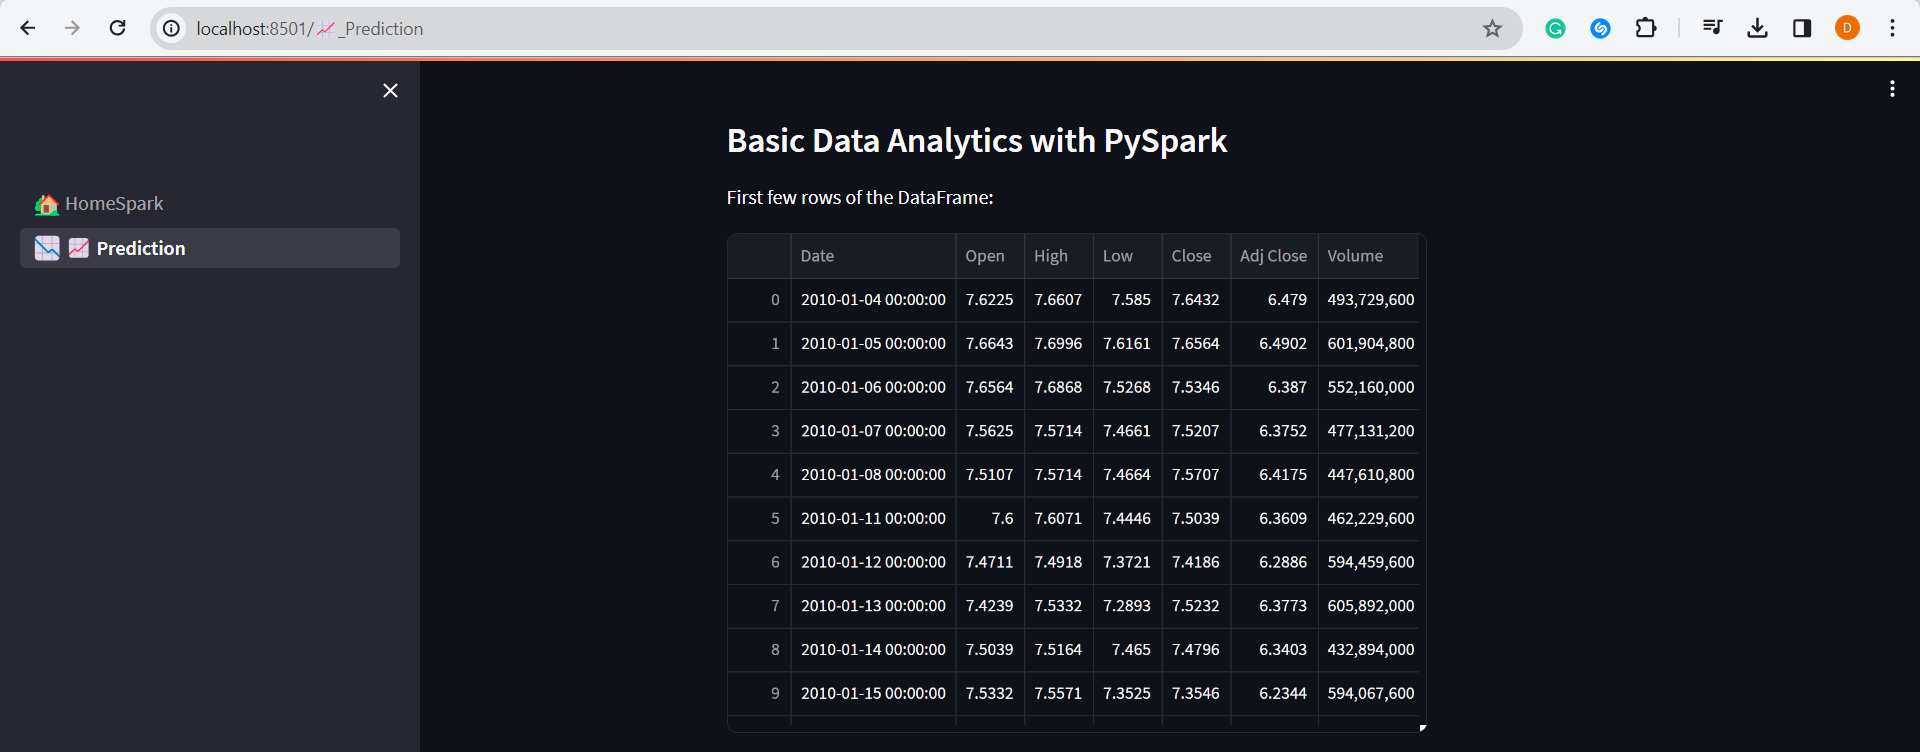

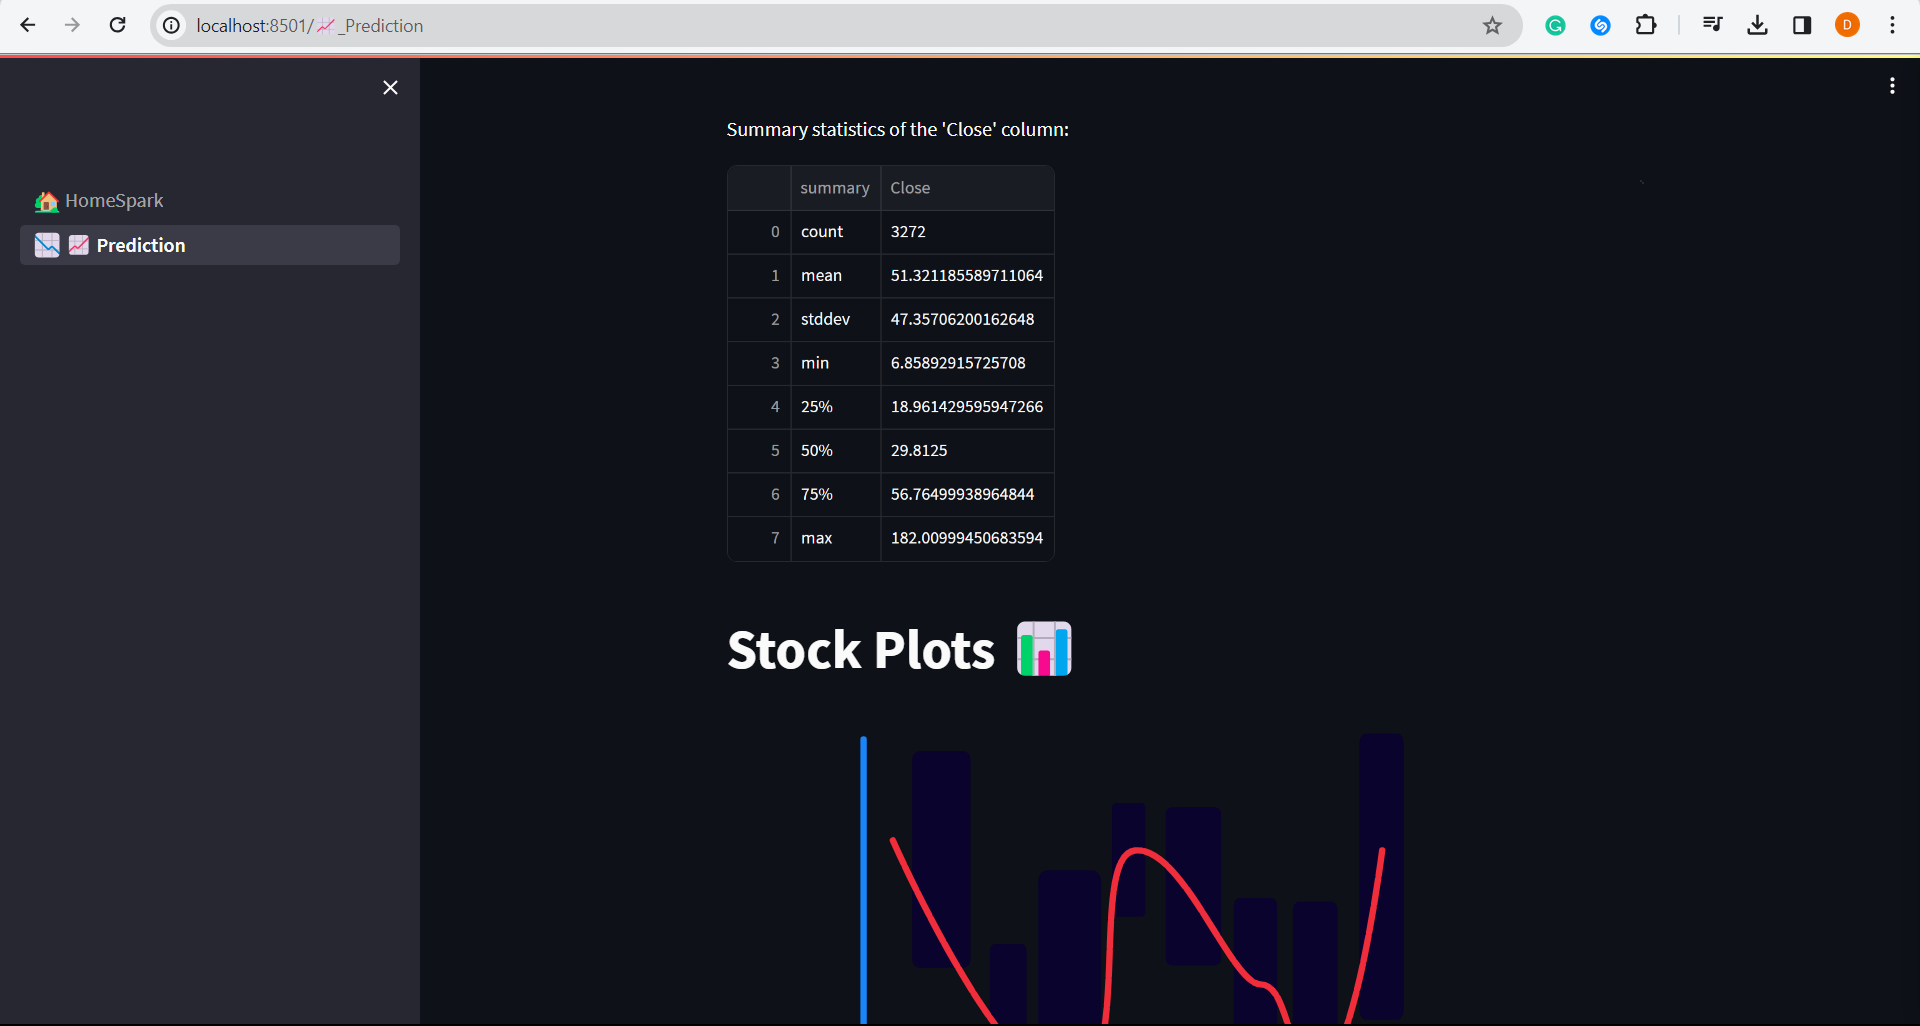

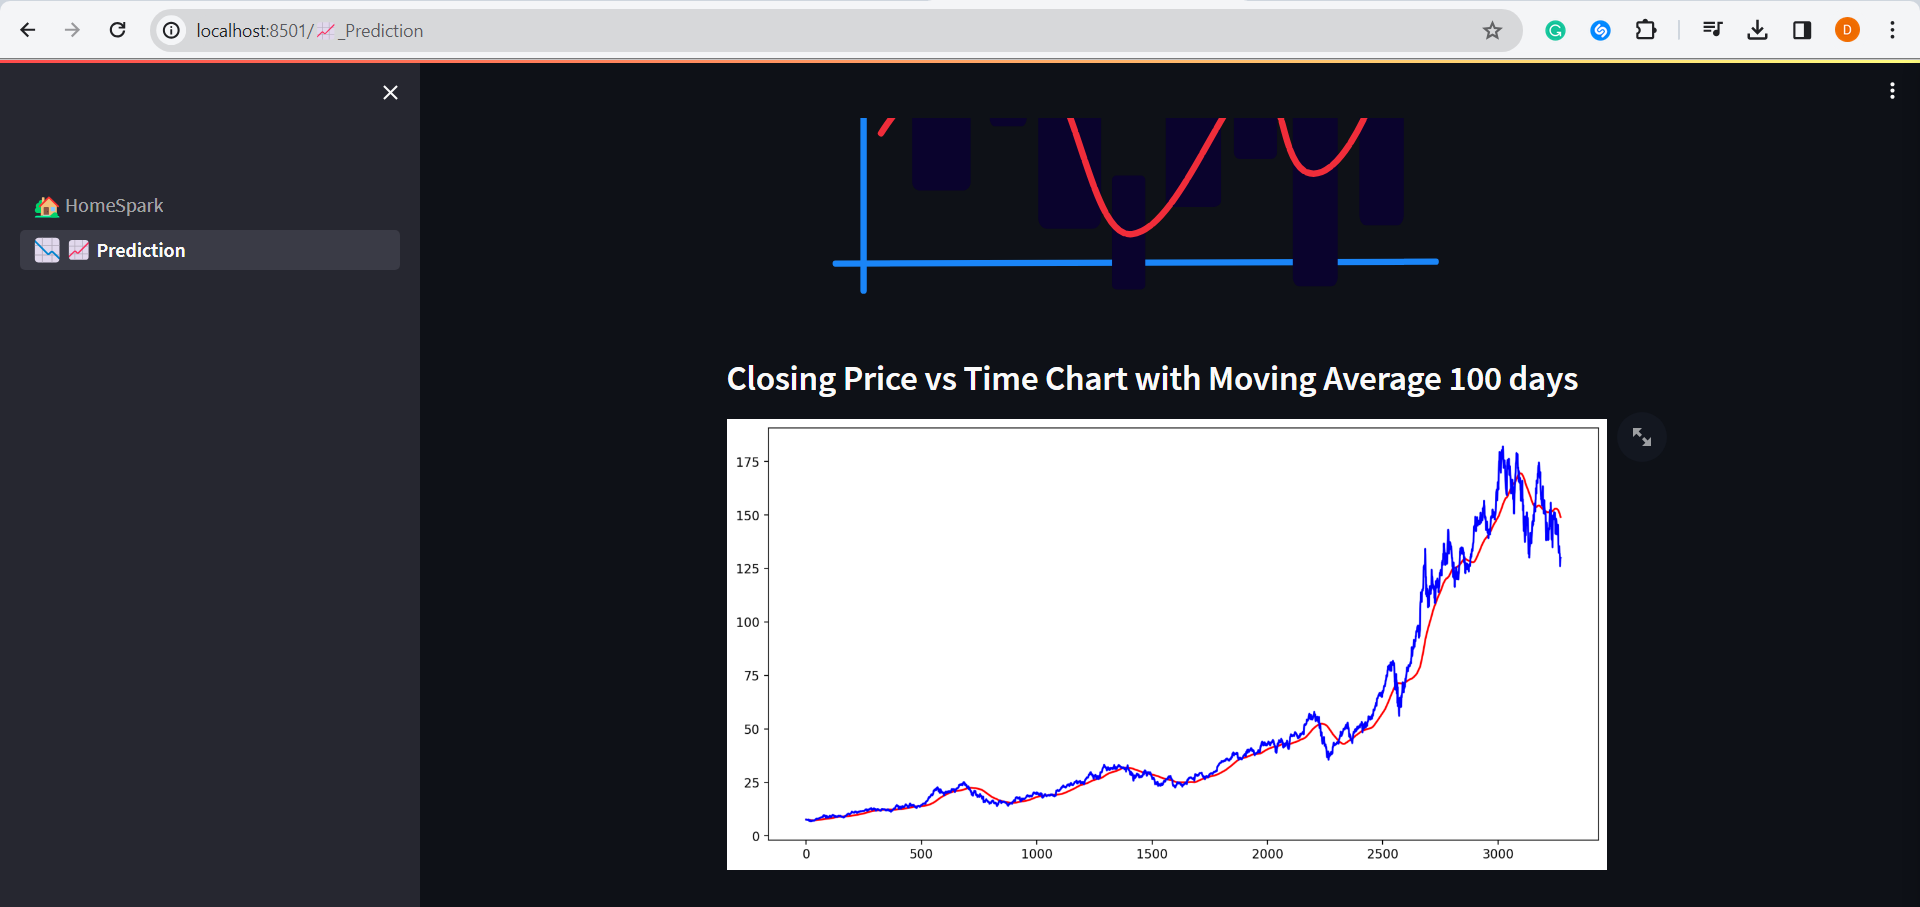

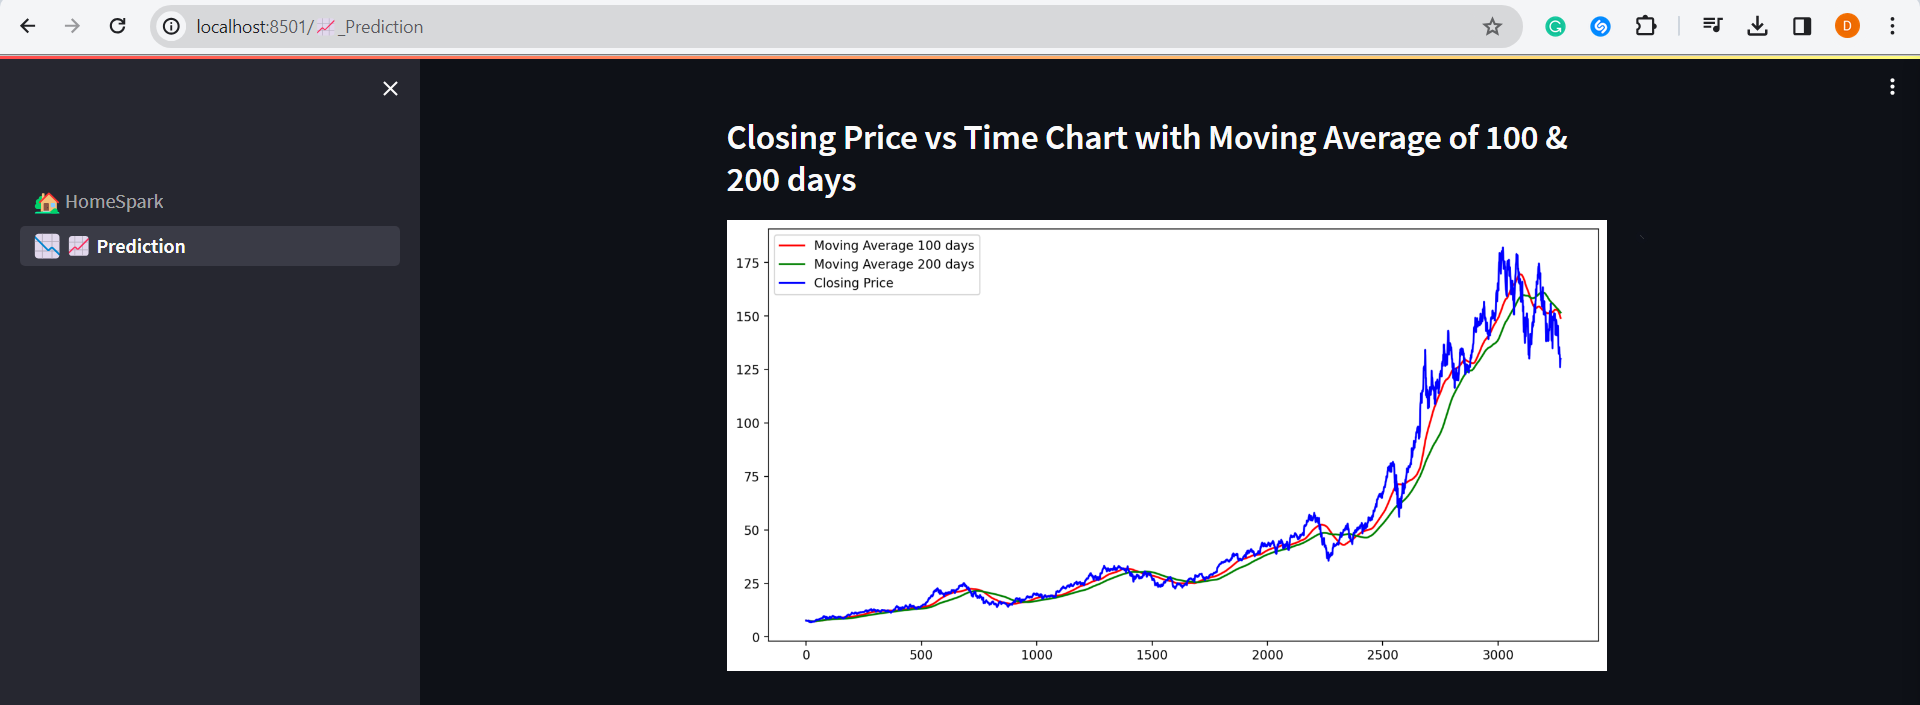

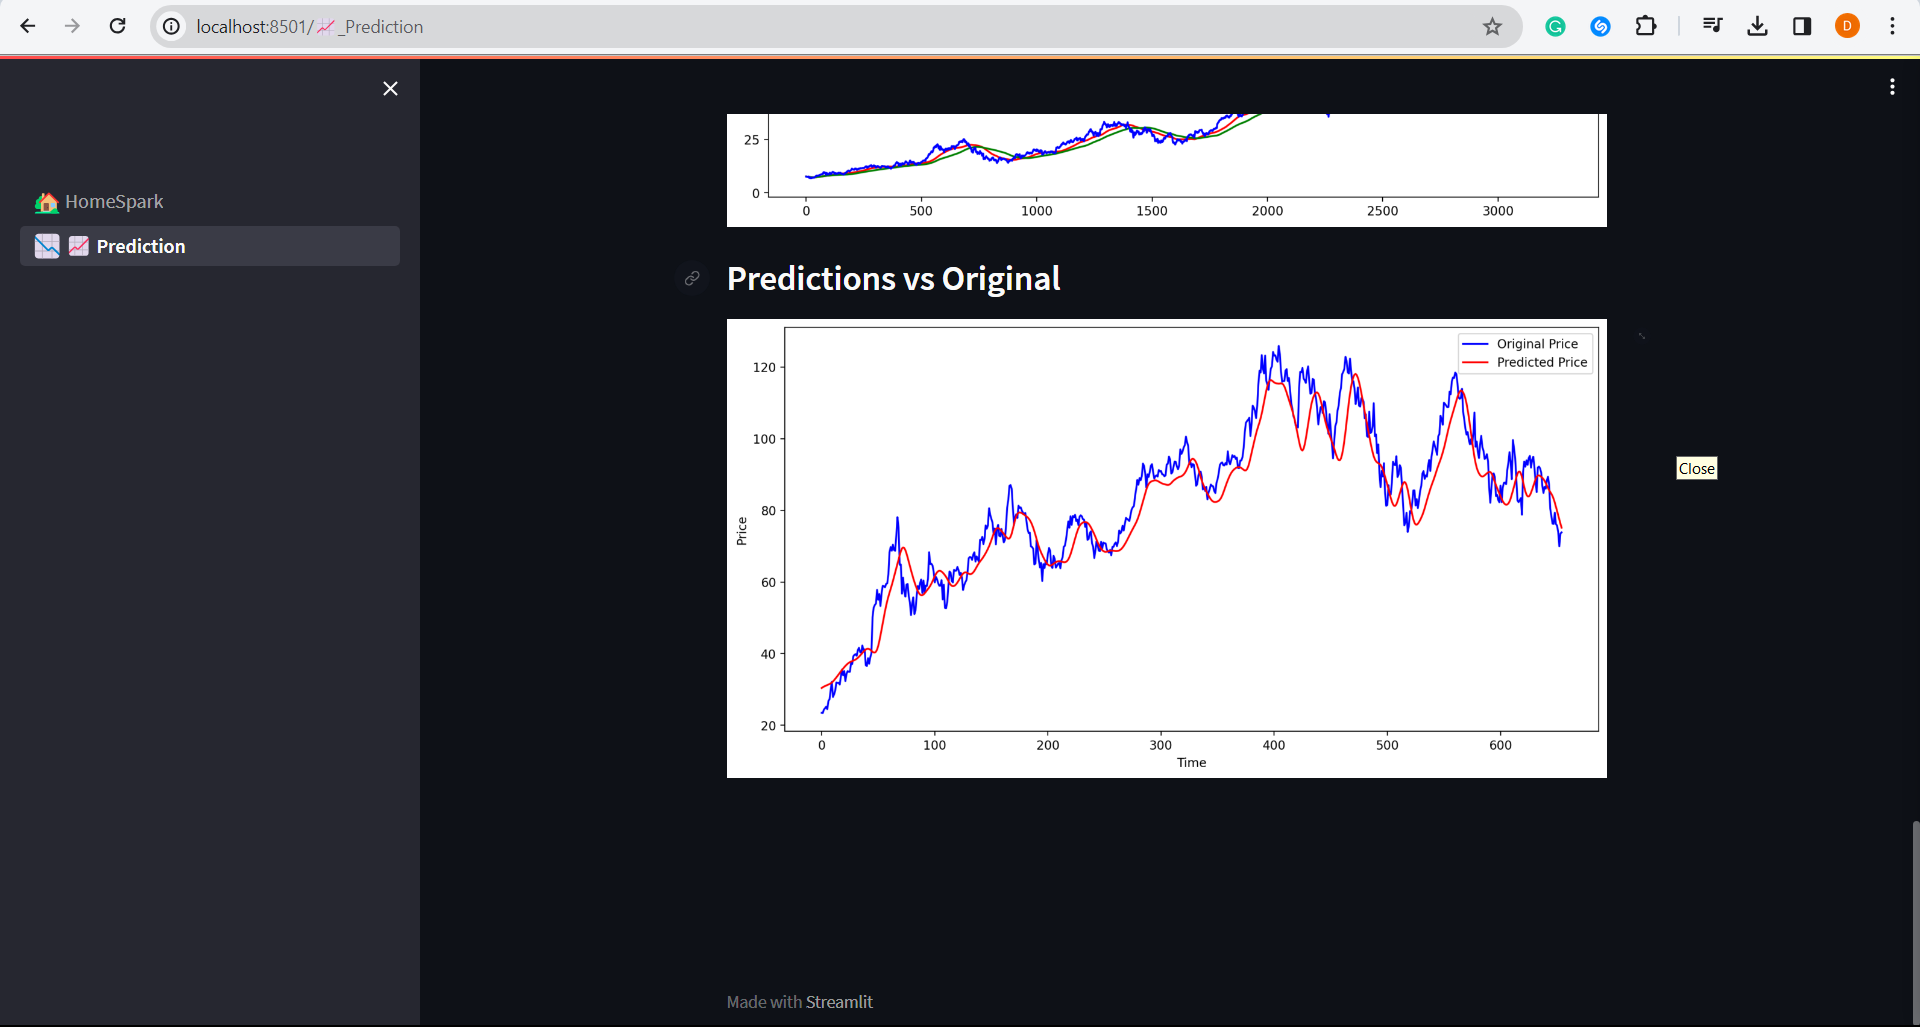

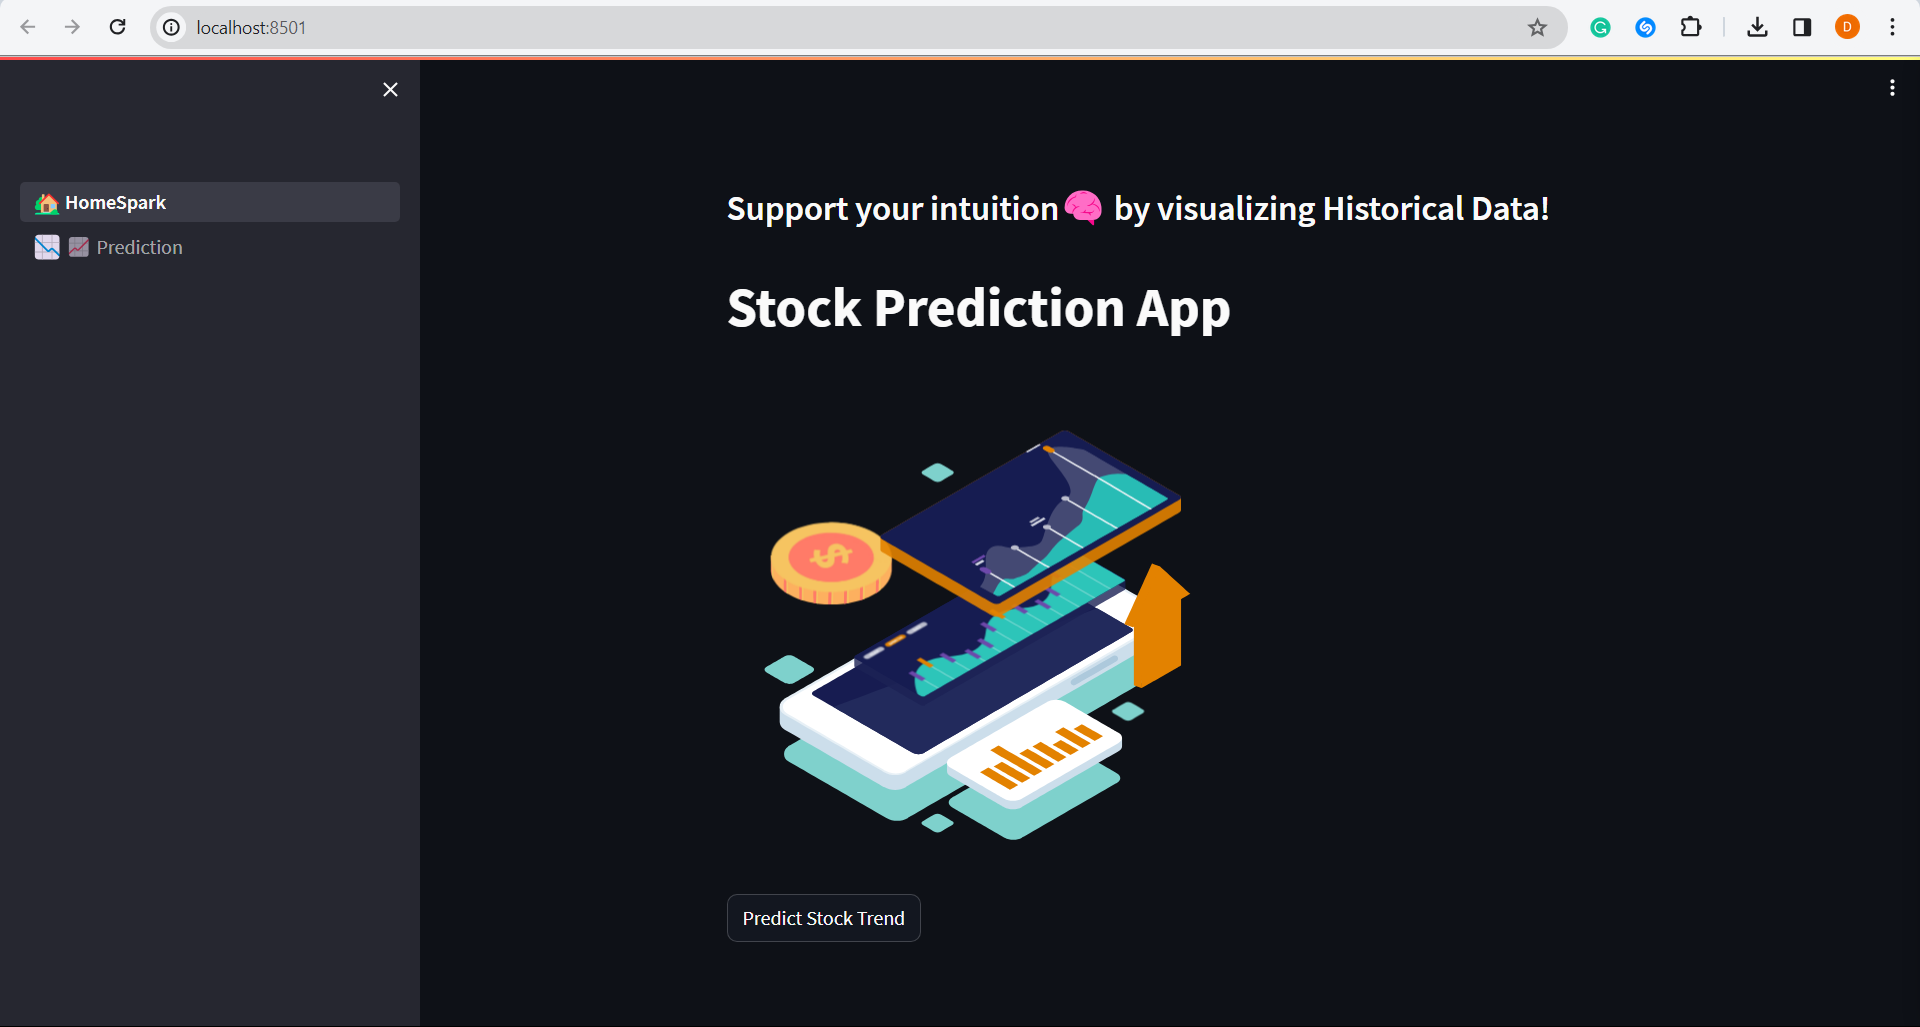

In [ ]:
from IPython.display import Image, display

# Display each image in the folder
for image_file in file_list:
    display(Image(image_file))
